# Global Power Plant Database Project

## Dataset Description
The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

## Attributes Description:
country (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]

country_long (text): longer form of the country designation

name (text): name or title of the power plant, generally in Romanized form

gppd_idnr (text): 10 or 12 character identifier for the power plant

capacity_mw (number): electrical generating capacity in megawatts

latitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

longitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

primary_fuel (text): energy source used in primary electricity generation or export

other_fuel1 (text): energy source used in electricity generation or export

other_fuel2 (text): energy source used in electricity generation or export

other_fuel3 (text): energy source used in electricity generation or export

commissioning_year (number): year of plant operation, weighted by unit-capacity when data is available

owner (text): majority shareholder of the power plant, generally in Romanized form

source (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form

url (text): web document corresponding to the source field

geolocation_source (text): attribution for geolocation information

wepp_id (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.

year_of_capacity_data (number): year the capacity information was reported

generation_gwh_2013 (number): electricity generation in gigawatt-hours reported for the year 2013

generation_gwh_2014 (number): electricity generation in gigawatt-hours reported for the year 2014

generation_gwh_2015 (number): electricity generation in gigawatt-hours reported for the year 2015

generation_gwh_2016 (number): electricity generation in gigawatt-hours reported for the year 2016

generation_gwh_2017 (number): electricity generation in gigawatt-hours reported for the year 2017

generation_gwh_2018 (number): electricity generation in gigawatt-hours reported for the year 2018

generation_gwh_2019 (number): electricity generation in gigawatt-hours reported for the year 2019

generation_data_source (text): attribution for the reported generation information

estimated_generation_gwh_2013 (number): estimated electricity generation in gigawatt-hours for the year 2013

estimated_generation_gwh_2014 (number): estimated electricity generation in gigawatt-hours for the year 2014

estimated_generation_gwh_2015 (number): estimated electricity generation in gigawatt-hours for the year 2015

estimated_generation_gwh_2016 (number): estimated electricity generation in gigawatt-hours for the year 2016

estimated_generation_gwh_2017 (number): estimated electricity generation in gigawatt-hours for the year 2017

estimated_generation_note_2013 (text): label of the model/method used to estimate generation for the year 2013

estimated_generation_note_2014 (text): label of the model/method used to estimate generation for the year 2014

estimated_generation_note_2015 (text): label of the model/method used to estimate generation for the year 2015

estimated_generation_note_2016 (text): label of the model/method used to estimate generation for the year 2016

estimated_generation_note_2017 (text): label of the model/method used to estimate generation for the year 2017


## Objective:
The objective of this project is to predict primary fuel and capacity_mw for the power plant based on the details provided in the dataset. In this project, the prediction of primary fuel and capacity_mw for the power plant involves the implementation of two separate models, classification model for predicting power plant's primary fuel  and regression model for predicting power plant's capacity_mw.

## Features and Target variable for Primary Fuel Prediction:

### Features: 
country, country_long, name, gppd_idnr, capacity_mw, latitude, longitude, other_fuel1, other_fuel2, other_fuel3, commissioning_year, owner, source, url, geolocation_source, wepp_id, year_of_capacity_data, generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018, generation_gwh_2019, generation_data_source, estimated_generation_gwh

### Target variable:
primary_fuel

## Features and Target variable for Capacity_ MW Prediction:

### Features: 
country, country_long, name, gppd_idnr, latitude, longitude, other_fuel1, other_fuel2, other_fuel3, commissioning_year, owner, source, url, geolocation_source, wepp_id, year_of_capacity_data, generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018, generation_gwh_2019, generation_data_source, estimated_generation_gwh

### Target variable:
capacity_mw

In [1]:
# Numerical computation and data manipulation 
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Z-score normalization and Box-Cox transformation
from scipy.stats import zscore, yeojohnson

# Suppress warnings
import warnings 
warnings.filterwarnings('ignore')

# Data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# SMOTE for class imbalance problem
from imblearn.over_sampling import SMOTE

# VIF calculation
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Regression models
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet

# K-Nearest Neighbors Classifier and Regressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

# Gausian Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

# Decision Tree Classifier and Regressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

# Support Vector Classifier and Regressor
from sklearn.svm import SVC, SVR

# Ensemble Algorithms
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier, 
BaggingClassifier, RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor, BaggingRegressor)

# XGBoost for boosting
import xgboost as xgb

# Metrics for checking the performance of models
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, mean_squared_error, mean_absolute_error, 
r2_score)
from sklearn.metrics import auc, roc_curve, RocCurveDisplay

# Data splitting and validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV

# Saving and loading models
import joblib

In [2]:
# Load data from CSV into DataFrame
df = pd.read_csv('Global_Power_Plant_Dataset.csv')

In [3]:
# Display first 5 rows of the dataframe
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [4]:
# Display last 5 rows of the dataframe
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Display shape of the dataframe
df.shape

(907, 27)

Dataframe has 907 rows and 27 columns.

In [6]:
# Display the names of the columns 
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [7]:
# Display the datatype of each column
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

Columns such as country, country_long, name, gppd_idnr, primary_fuel, other_fuel1, other_fuel2, owner, source, url, geolocation_source, and generation_data_source have object datatype.


Columns such as capacity_mw, latitude, longitude, other_fuel3, commissioning_year, wepp_id, year_of_capacity_data, generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018, generation_gwh_2019, and estimated_generation_gwh have float datatype.

In [8]:
# Let check if any whitespace,'?' 'NA' or '-' exist in dataset.
df.isin([' ','NA','-','?']).sum().any()

False

No whitespace,'?' 'NA' or '-' present in the dataset.

In [9]:
# Checking for the duplicated values in the dataset
df.duplicated().sum()

0

No duplicated rows present in the dataset.

In [10]:
# Checking for the null values in the dataset
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

Yes null values are present in the dataset.

In [11]:
# Calculate the percentage of missing data for each column
missing_percentage = (df.isnull().mean() * 100).round(2)

# Create a DataFrame to display the results
missing_data_info = pd.DataFrame({'Missing Values': df.isnull().sum(), '% Missing Data': missing_percentage})

# Sort the missing data information in descending order by '% Missing Data'
missing_data_info = missing_data_info.sort_values(by='% Missing Data', ascending=False)

# Print the sorted missing data information
print(missing_data_info)

                          Missing Values  % Missing Data
estimated_generation_gwh             907          100.00
other_fuel3                          907          100.00
wepp_id                              907          100.00
generation_gwh_2013                  907          100.00
generation_gwh_2019                  907          100.00
other_fuel2                          906           99.89
other_fuel1                          709           78.17
owner                                565           62.29
generation_gwh_2014                  509           56.12
generation_gwh_2015                  485           53.47
generation_gwh_2016                  473           52.15
generation_gwh_2017                  467           51.49
generation_gwh_2018                  459           50.61
generation_data_source               458           50.50
year_of_capacity_data                388           42.78
commissioning_year                   380           41.90
latitude                       

These columns are almost empty:

estimated_generation_gwh

other_fuel3

wepp_id

generation_gwh_2013

generation_gwh_2019

other_fuel2       

Dropping them from the dataset will enhance the data analysis.

In [12]:
# Dropping empty columns
columns_to_drop = ['name', 'estimated_generation_gwh', 'other_fuel3', 'wepp_id', 'generation_gwh_2013', 'generation_gwh_2019',
                   'other_fuel2']

df.drop(columns = columns_to_drop, axis = 1, inplace = True)

## Imputing Missing Values

In [13]:
# Impute 'geolocation_source' with mode
df['geolocation_source'].fillna(df['geolocation_source'].mode()[0], inplace = True)

# Impute 'longitude' and 'latitude' with mean
df['longitude'].fillna(df['longitude'].mean(), inplace = True)
df['latitude'].fillna(df['latitude'].mean(), inplace = True)

# Impute 'other_fuel1' missing values with "Not Applicable"
df['other_fuel1'].fillna("Not Applicable", inplace = True)

The columns 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', and 'generation_gwh_2018' contain some missing data. However, since electricity production by power plants can change from year to year, simply filling in these gaps with the average isn't the best approach.

A better method is to calculate the total electricity generation from 2014 to 2018 and store this sum in a new column named 'total_generation_gwh_2014_2018'. This approach provides a more accurate and comprehensive overview of the data, without making assumptions about the missing values.

In [14]:
# Storing sum of above mentioned columns in 'total_generation_gwh_2014_2018'
df[ 'total_generation_gwh_2014_2018'] = df[['generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']].sum(axis = 1)

Several columns in the dataset, including 'country', 'country_long', 'gppd_idnr', 'url', 'owner', 'year_of_capacity_data', 'commissioning_year', and 'generation_data_source', do not contain relevant data for further analysis or machine learning modeling. It is necessary to remove these columns from the dataset.

Moreover, the data from the columns 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', and 'generation_gwh_2018' has been aggregated and stored as the total in the 'total_generation_gwh_2014_2018' column. Therefore, there is no need to retain these individual year columns in the dataset. This will help maintain a more concise and focused dataset for further analysis and modeling. 

In [15]:
# List of columns to drop
columns_to_drop = ['country', 'country_long', 'gppd_idnr', 'url', 'owner', 'year_of_capacity_data', 'generation_data_source',
                   'commissioning_year', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 
                   'generation_gwh_2017', 'generation_gwh_2018' ]
df.drop(columns = columns_to_drop, axis = 1, inplace = True)

In [16]:
# Again checking for the null values
df.isnull().sum()

capacity_mw                       0
latitude                          0
longitude                         0
primary_fuel                      0
other_fuel1                       0
source                            0
geolocation_source                0
total_generation_gwh_2014_2018    0
dtype: int64

In [17]:
# Display shape of the dataframe after updation
df.shape

(907, 8)

In [18]:
# Display dataframe after updation
df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,total_generation_gwh_2014_2018
0,2.5,28.1839,73.2407,Solar,Not Applicable,National Renewable Energy Laboratory,National Renewable Energy Laboratory,0.000000
1,98.0,24.7663,74.6090,Coal,Not Applicable,Ultratech Cement ltd,WRI,0.000000
2,39.2,21.9038,69.3732,Wind,Not Applicable,CDM,WRI,0.000000
3,135.0,23.8712,91.3602,Gas,Not Applicable,Central Electricity Authority,WRI,3637.554320
4,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,27859.499736


In [19]:
# Checking for the number of unique values present inside each column
df.nunique()

capacity_mw                       361
latitude                          837
longitude                         828
primary_fuel                        8
other_fuel1                         4
source                            191
geolocation_source                  3
total_generation_gwh_2014_2018    433
dtype: int64

capacity_mw: 361 unique values (power plant capacity in MW).

latitude: 837 unique values (latitude coordinates).

longitude: 828 unique values (longitude coordinates).

primary_fuel: 8 unique values (types of primary fuels).

other_fuel1: 4 unique values (types of secondary fuels).

source: 191 unique values (data sources).

geolocation_source: 3 unique values (geolocation sources).

total_generation_gwh_2014_2018: 433 unique values (total electricity generation from 2014 to 2018).

In [20]:
# Separating numerical columns and categorical columns for further data analysis
categorical_columns = []
numerical_columns = []

for i in df.columns:
    if df[i].dtypes == 'object':
        categorical_columns.append(i)
    elif df[i].dtypes == 'int64' or df[i].dtypes == 'float64':
        numerical_columns.append(i)

In [21]:
# Display the list of categorical columns
categorical_columns

['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']

In [22]:
# Display the list of numerical columns
numerical_columns

['capacity_mw', 'latitude', 'longitude', 'total_generation_gwh_2014_2018']

In [23]:
# Display the lengths of both the lists
print("No. of categorical columns:", len(categorical_columns))
print("No. of numerical columns:", len(numerical_columns))

No. of categorical columns: 4
No. of numerical columns: 4


In [24]:
# Display unique values present inside each categorical column
for i in categorical_columns:
    print(i, ":")
    print(df[i].unique())
    print("\n")

primary_fuel :
['Solar' 'Coal' 'Wind' 'Gas' 'Hydro' 'Biomass' 'Oil' 'Nuclear']


other_fuel1 :
['Not Applicable' 'Oil' 'Cogeneration' 'Gas']


source :
['National Renewable Energy Laboratory' 'Ultratech Cement ltd' 'CDM'
 'Central Electricity Authority' 'Hindustan Pvt lt' 'Dr Ssk ltd'
 'Ashok Ssk ltd' 'Shree Sugars ltd' 'Navbharat' 'Meil.In/P' 'Lancosola'
 'Indian Power ltd' 'Ballarpur Industries ltd' 'Jk Cement ltd'
 'India Ltd icl)' 'Ideal Projects ltd' 'Ugar Works ltd'
 'Vishwanath Sugars ltd' 'Hothur Pvt ltd' 'Janki Corp ltd'
 'Mysore Mills ltd' 'Sunflag Co ltd' 'Varam Pvt ltd' 'Sangam Spinners ltd'
 'Bharat Refinery ltd' 'Binani Industries ltd' 'Indo Synthetics ltd'
 'Ambed K Sugar' 'AES Winfra' 'Sembcorp' 'Punj Lloyd' 'Hiraco India'
 'Moserbaer Solar' 'Lingandwi' 'LEPL' 'CleanEnerg teLeanenergy'
 'Adani Power Limite r Er' 'Madhav Group' 'Power Private edM/Pdf'
 'Acc Acc ltd' 'Birla Corp ltd' 'Hindustan Zinc ltd' 'Gupta Ltd gepl)'
 'Manikghar Cement co' 'Core Fuels ltd'
 'Maharash

primary_fuel: There are 8 unique values representing different types of primary fuels used by power plants, including Solar, Coal, Wind, Gas, Hydro, Biomass, Oil, and Nuclear.

other_fuel1: This column has 4 unique values representing types of secondary fuels, including Not Applicable, Oil, Cogeneration, and Gas.

source: There are 191 unique values representing various sources or origins of the data.

geolocation_source: This column has 3 unique values indicating different sources or methods for determining geolocation data, which include National Renewable Energy Laboratory, WRI, and Industry About.

In [25]:
# Display value count for each unique value present in the categoical column
for i in categorical_columns:
    print(df[i].value_counts())
    print("\n")

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


Not Applicable    709
Oil               195
Gas                 2
Cogeneration        1
Name: other_fuel1, dtype: int64


Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
                                                              ... 
Harsha Engineers Limited                                         1
Godawari Energy ltd                                              1
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Yashwantrao Krishna ssk                              

primary_fuel: This column indicates the primary fuel types used by power plants. The counts reveal that Coal is the most common primary fuel, occurring 258 times, followed by Hydro (251), Solar (127), Wind (123), Gas (69), Biomass (50), Oil (20), and Nuclear (9).

other_fuel1: This column represents secondary or alternative fuels used by power plants. The majority of entries are labeled as Not Applicable (709 occurrences), followed by Oil (195), Gas (2), and Cogeneration (1).

source: This column signifies the sources or origins of the data related to power plants. The most frequent source is Central Electricity Authority (519 occurrences), followed by CDM (124), Lancosola (10), National Renewable Energy Laboratory (8), and several other sources.

geolocation_source: This column denotes the sources or methods used to determine geolocation data. WRI is the most common source, appearing 784 times, followed by Industry About (119), and National Renewable Energy Laboratory (4).

In [26]:
# Display unique values present inside each numerical column
for i in numerical_columns:
    print(i, ":")
    print(df[i].unique())
    print("\n")

capacity_mw :
[2.50000e+00 9.80000e+01 3.92000e+01 1.35000e+02 1.80000e+03 2.50000e+02
 6.00000e+01 1.92000e+02 2.90000e+02 2.10000e+02 1.35000e+03 1.34000e+02
 1.20000e+03 1.69500e+01 9.00000e+00 2.63000e+03 4.19330e+02 6.00000e+02
 1.00000e+01 1.70000e+01 2.40000e+01 6.52000e+02 4.60000e+01 5.00000e+01
 1.00000e+00 1.65000e+01 1.13600e+02 1.98000e+01 1.32000e+01 5.00000e+00
 7.05000e+02 2.80000e+01 4.50000e+02 1.80000e+02 1.05000e+03 5.10000e+02
 6.75000e+01 3.00000e+02 3.35000e+02 1.20000e+01 3.15000e+02 3.00000e+01
 2.00000e+01 4.20000e+01 7.20000e+02 9.00000e+01 1.32000e+03 1.20000e+02
 6.60000e+01 2.70000e+02 2.28000e+01 1.50000e+01 2.52000e+01 1.80000e+01
 1.70000e+03 2.60000e+01 4.10000e+01 1.37900e+03 3.40000e+01 1.60000e+01
 5.00000e+02 8.00000e+01 7.50000e+01 1.21000e+03 9.90000e+01 6.96000e+01
 6.00000e+00 7.50000e+02 4.00000e+01 1.65000e+02 7.00000e+01 8.15000e+01
 1.12000e+01 3.63000e+01 1.70000e+00 2.48000e+01 5.04000e+01 1.50000e+02
 9.87000e+01 3.00000e+00 4.20000e+00 

Each column contains a wide array of distinct and diverse values.

In [27]:
# Display value count for each unique value present in the numerical column
for i in numerical_columns:
    print(df[i].value_counts())
    print("\n")

5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64


21.197918    46
19.000400     3
24.191700     3
31.268000     2
14.235200     2
             ..
22.755400     1
27.159800     1
17.297000     1
20.877200     1
9.934400      1
Name: latitude, Length: 837, dtype: int64


77.464907    46
71.691700     4
75.898800     3
71.691800     3
72.898300     3
             ..
70.396100     1
74.239300     1
77.043500     1
73.825400     1
77.476800     1
Name: longitude, Length: 828, dtype: int64


0.000000        475
12286.275300      1
48808.660000      1
7177.969750       1
2050.476100       1
               ... 
885.928100        1
27973.059128      1
32152.510000      1
73980.020000      1
1786.491525       1
Name: total_generation_gwh_2014_2018, Length: 433, dtype: int64




The occurrence pattern of values in each column displays a wide and diverse array of distinct values.

In [28]:
# Display dataframe's details, such as columns' data type and no. of non_null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   capacity_mw                     907 non-null    float64
 1   latitude                        907 non-null    float64
 2   longitude                       907 non-null    float64
 3   primary_fuel                    907 non-null    object 
 4   other_fuel1                     907 non-null    object 
 5   source                          907 non-null    object 
 6   geolocation_source              907 non-null    object 
 7   total_generation_gwh_2014_2018  907 non-null    float64
dtypes: float64(4), object(4)
memory usage: 56.8+ KB


In [29]:
# Display summary statistics of the dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
capacity_mw,907.0,326.223755,590.085456,0.0000,16.7250,59.2000,385.25000,4760.000
latitude,907.0,21.197918,6.079148,8.1689,17.0720,21.2818,25.17645,34.649
longitude,907.0,77.464907,4.812291,68.6447,74.3889,76.9792,79.20610,95.408
total_generation_gwh_2014_2018,907.0,5898.386424,15335.620295,0.0000,0.0000,0.0000,3838.33400,156908.000


#### capacity_mw
The capacity of power plants in this dataset ranges from 0.00 MW to 4760.00 MW, with an average capacity of approximately 326.22 MW. This indicates a diverse range of power plant sizes, with a moderate average capacity.

#### latitude
The latitude values span from 8.17 degrees to 34.65 degrees, with an average latitude of around 21.20 degrees. These values represent the geographical coordinates of power plants, indicating their locations across a wide latitude range.

#### longitude
Longitude values vary between 68.64 degrees and 95.41 degrees, with an average longitude of approximately 77.46 degrees. This column represents the geographic longitudes of power plants, reflecting their dispersion across different longitudes.

#### total_generation_gwh_2014_2018
Total electricity generation over the period 2014-2018 ranges from 0.00 GWh to 156908.00 GWh, with an average generation of roughly 5898.39 GWh. This column provides insights into the historical electricity production of these power plants, with a wide range of generation values.

In [30]:
# Display summary statistics of the dataframe for categorical columns
df.describe(include = 'O')

,primary_fuel,other_fuel1,source,geolocation_source
count,907,907,907,907
unique,8,4,191,3
top,Coal,Not Applicable,Central Electricity Authority,WRI
freq,258,709,519,784


#### primary_fuel
The 'primary_fuel' column contains eight unique fuel types used by power plants. The most common primary fuel type is Coal, with a frequency of 258 occurrences, indicating that coal is a prevalent choice among power plants in the dataset.

#### other_fuel1
In the 'other_fuel1' column, there are four unique values. The most frequent value is Not Applicable appearing 709 times. This suggests that the majority of power plants in the dataset do not have an additional listed fuel source.

#### source
The source column provides information about the data source or organization, with 191 unique values. The most frequent source is Central Electricity Authority occurring 519 times, indicating it as a prominent contributor of data.

#### geolocation_source
The geolocation_source column contains three unique values. The most common source is WRI with a frequency of 784, indicating that the World Resources Institute is a primary source of geolocation data for the power plants in the dataset.

## Data Visualization

In [31]:
sns.set(style = 'whitegrid')

### Univariate Analysis

### Count Plot

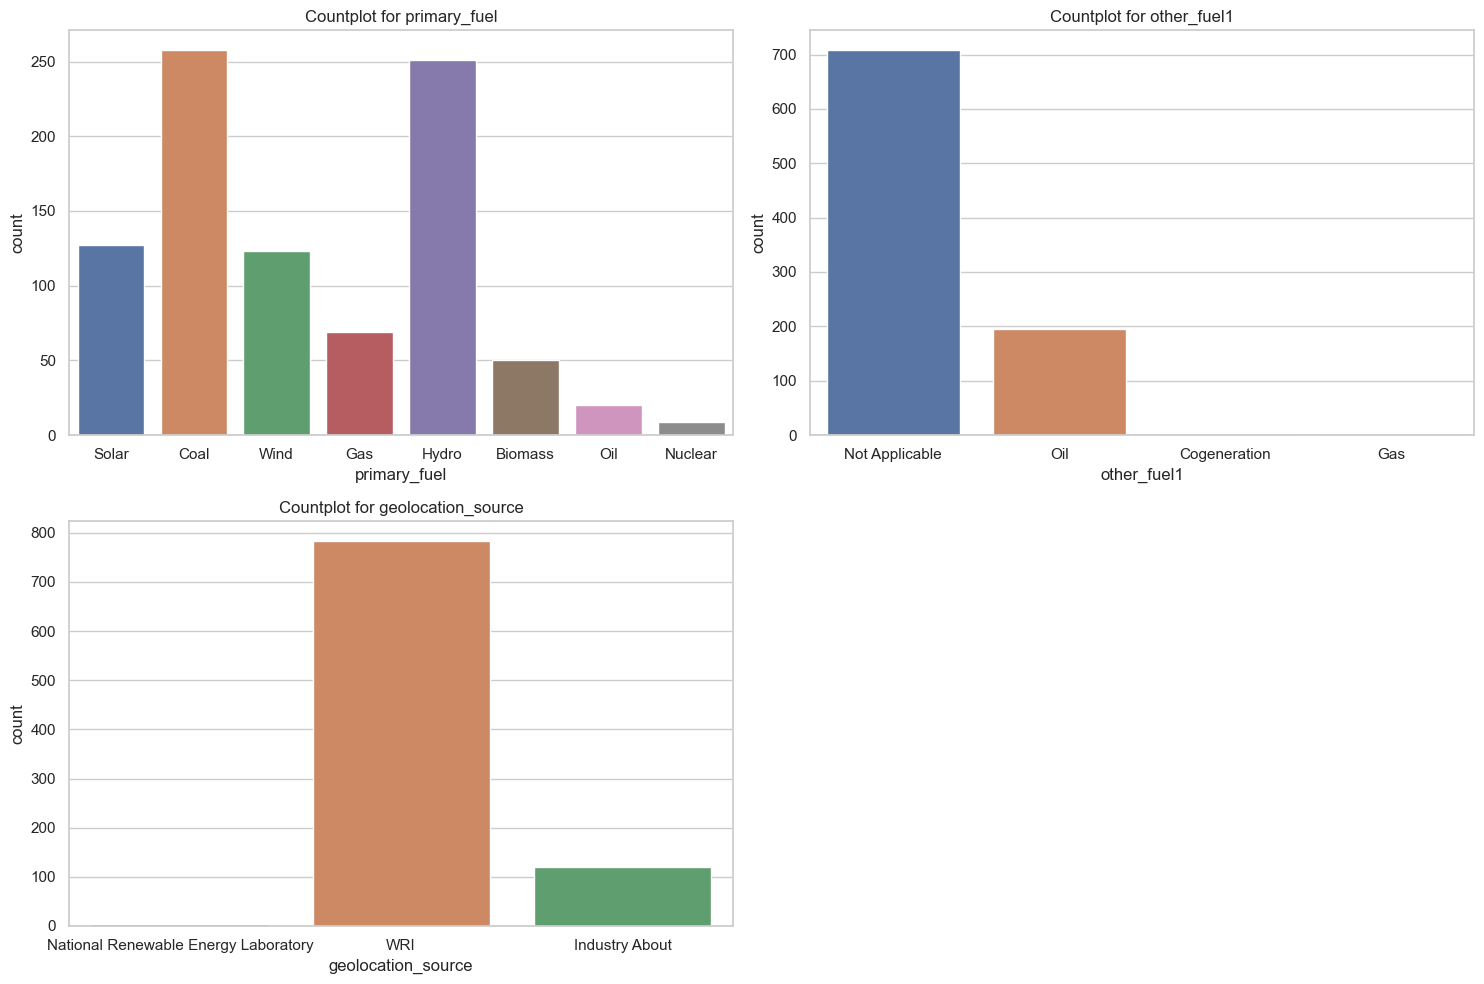

In [32]:
# Univariate analysis using Count plot for categorical columns
columns_to_plot = ['primary_fuel', 'other_fuel1', 'geolocation_source']
rows = 2
columns = 2
plt.figure(figsize = (15, 10))

for i in range(0, len(columns_to_plot)):
    plt.subplot(rows, columns, i+1)
    sns.countplot(df[columns_to_plot[i]]) 
    plt.title("Countplot for " + columns_to_plot[i])
    plt.tight_layout()

plt.show()

### Observations:
Count plots for columns 'primary_fuel', 'other_fuel1', and 'geolocation_source' showing count for each unique value in the column.

### Pie Chart

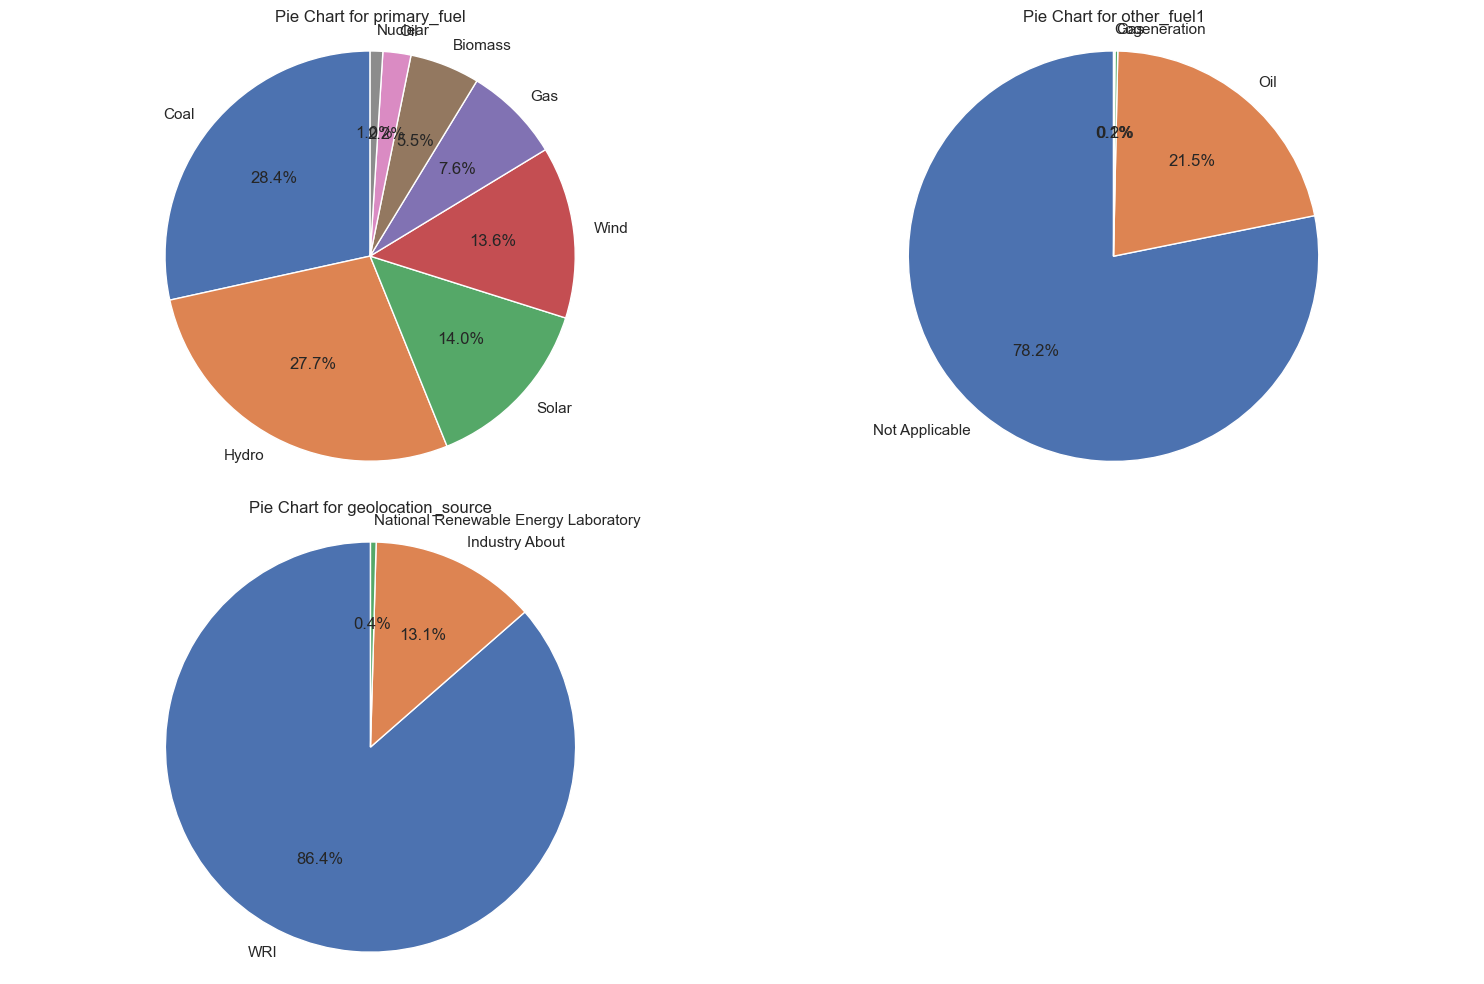

In [33]:
# Univariate analysis using Pie chart for categorical columns 
columns_to_plot = columns_to_plot = ['primary_fuel', 'other_fuel1', 'geolocation_source']
rows = 2
columns = 2
plt.figure(figsize = (15, 10))

for i in range(0, len(columns_to_plot)):
    plt.subplot(rows, columns, i + 1)
    category_counts = df[columns_to_plot[i]].value_counts()
    plt.pie(category_counts, labels = category_counts.index, autopct='%1.1f%%', startangle = 90)
    plt.title("Pie Chart for " + columns_to_plot[i])
    plt.axis('equal')
plt.tight_layout()
plt.show()

### Observations:
Pie charts for columns 'primary_fuel', 'other_fuel1', and 'geolocation_source' percentage of for each unique value in the column.

### Histogram

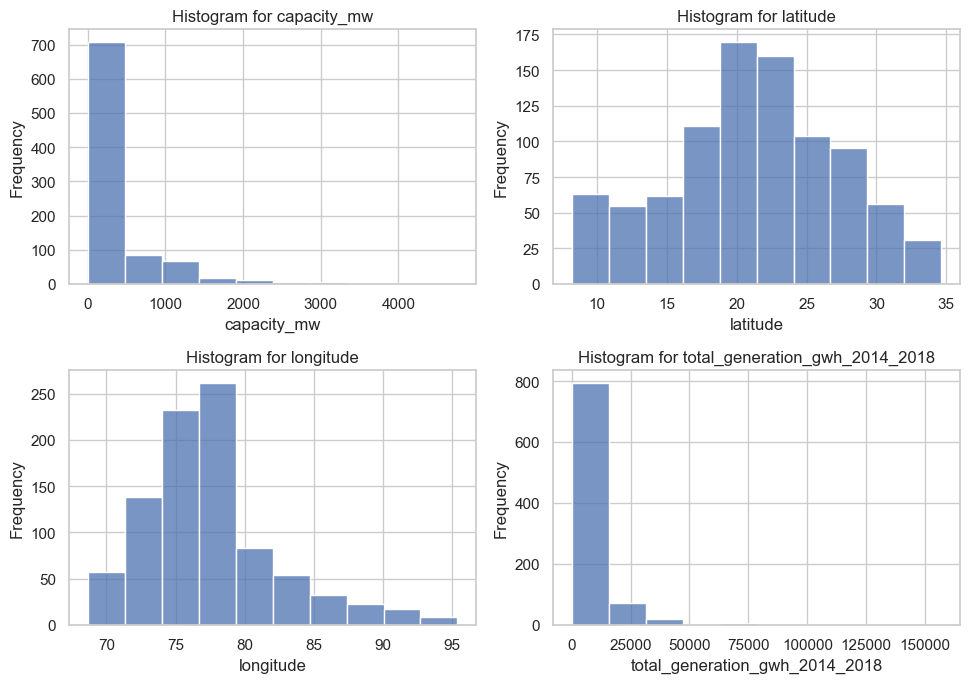

In [34]:
# Univariate analysis using Histogram for numerical columns
columns_to_plot = ['capacity_mw', 'latitude', 'longitude', 'total_generation_gwh_2014_2018']
rows = 2
columns = 2

plt.figure(figsize = (10, 7))

for i in range(0, len(columns_to_plot)):
    plt.subplot(rows, columns, i+1)
    sns.histplot(df[columns_to_plot[i]], bins = 10) 
    plt.title("Histogram for " + columns_to_plot[i])
    plt.ylabel("Frequency")
    plt.tight_layout()

plt.show()

### Observations:
Histograms for columns 'capacity_mw', 'latitude', 'longitude', and 'total_generation_gwh_2014_2018' showing frequency distribution for values in the column.

### Violin Plot

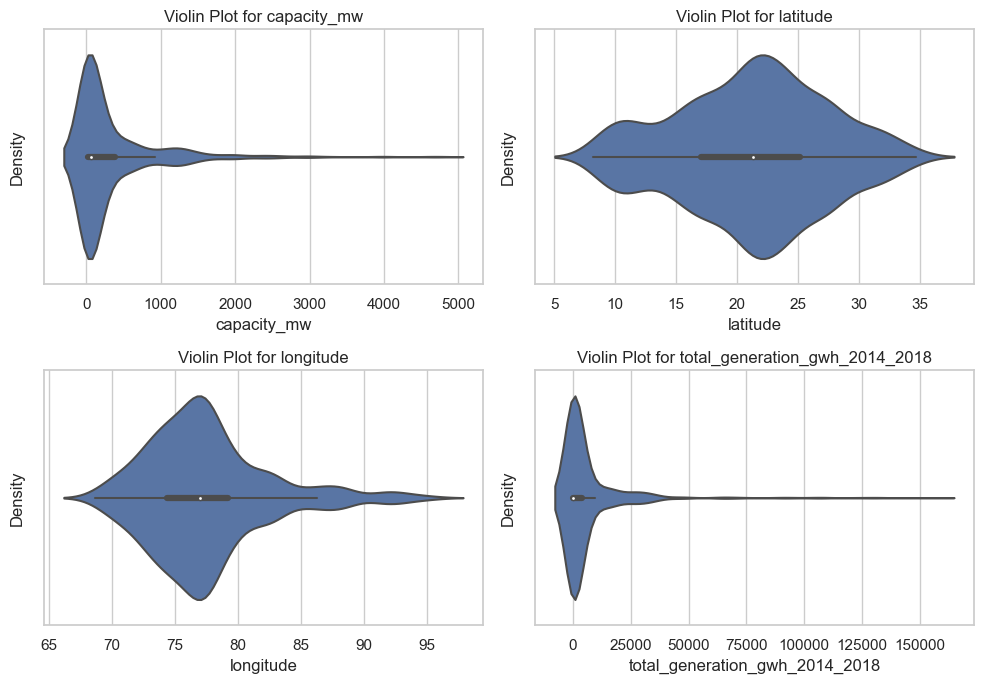

In [35]:
# Univariate analysis using violin plot for numerical columns

# Columns to plot
columns_to_plot = ['capacity_mw', 'latitude', 'longitude', 'total_generation_gwh_2014_2018']

# Define the number of rows and columns for subplots
rows = 2
columns = 2

# Create a figure with the specified size
plt.figure(figsize = (10, 7))

# Loop through the columns and create violin plots
for i in range(0, len(columns_to_plot)):
    plt.subplot(rows, columns, i + 1)
    sns.violinplot(x=df[columns_to_plot[i]])
    plt.title("Violin Plot for " + columns_to_plot[i])
    plt.xlabel(columns_to_plot[i])
    plt.ylabel("Density")
    plt.tight_layout()

plt.show()

### Observations:
Violin plots for columns 'capacity_mw', 'latitude', 'longitude', and 'total_generation_gwh_2014_2018' showing density distribution for values in the column.

### Bivariate Analysis

### Scatter Plot

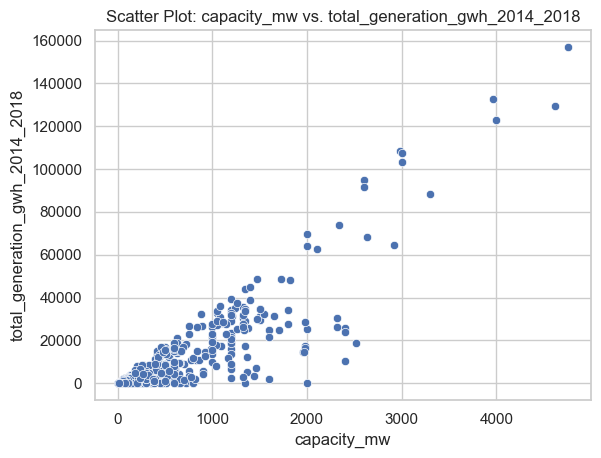

In [36]:
# Bivariate analysis using scatterplot
sns.scatterplot(x = 'capacity_mw', y='total_generation_gwh_2014_2018', data = df)
plt.title('Scatter Plot: capacity_mw vs. total_generation_gwh_2014_2018')
plt.xlabel('capacity_mw')
plt.ylabel('total_generation_gwh_2014_2018')
plt.show()

### Observations:
The scatter plot shows the relationship between power plant capacity and total electricity generation. It reveals how capacity and generation vary across power plants, identifies potential outliers, and offers a visual impression of any correlation between the two variables.

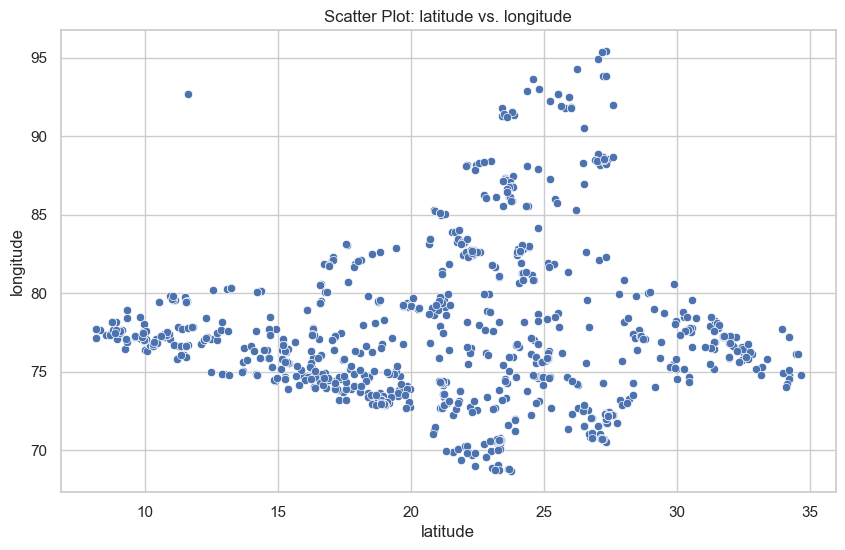

In [37]:
# Bivariate analysis using scatterplot
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'latitude', y = 'longitude', data = df)
plt.title('Scatter Plot: latitude vs. longitude')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.show()

### Observations:

The scatter plot displays the geographical distribution of data points, where each point represents a location based on its latitude and longitude coordinates. It provides insights into the spatial distribution of data and the relative positions of these points on the Earth's surface.

### Box Plot

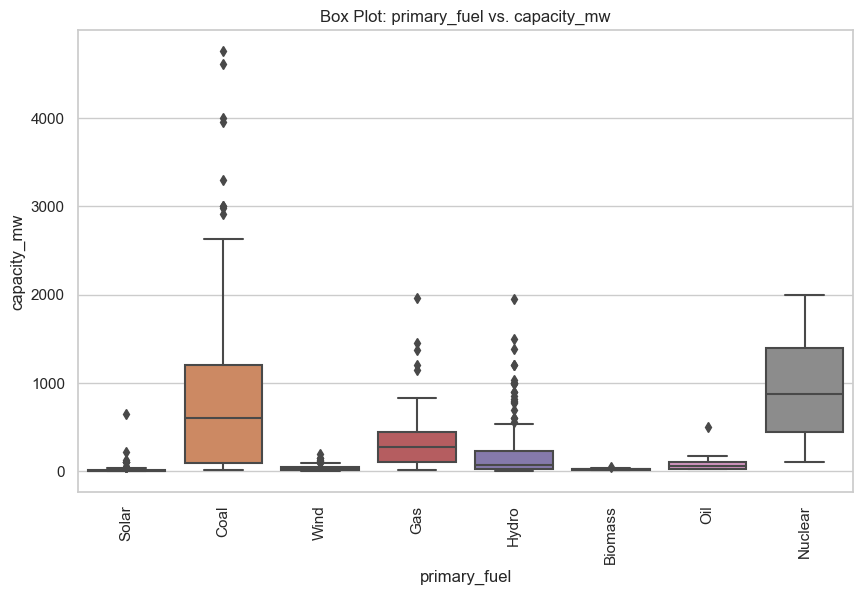

In [38]:
# Bivariate analysis using boxplot
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'primary_fuel', y = 'capacity_mw', data = df)
plt.title('Box Plot: primary_fuel vs. capacity_mw')
plt.xticks(rotation = 90)
plt.xlabel('primary_fuel')
plt.ylabel('capacity_mw')
plt.show()

### Observations:
The box plot shows the distribution of power plant capacity ('capacity_mw') for different primary fuel types ('primary_fuel'). Each box represents a fuel type, and the box's height and spread indicate the range and variability of capacity within each fuel category. 

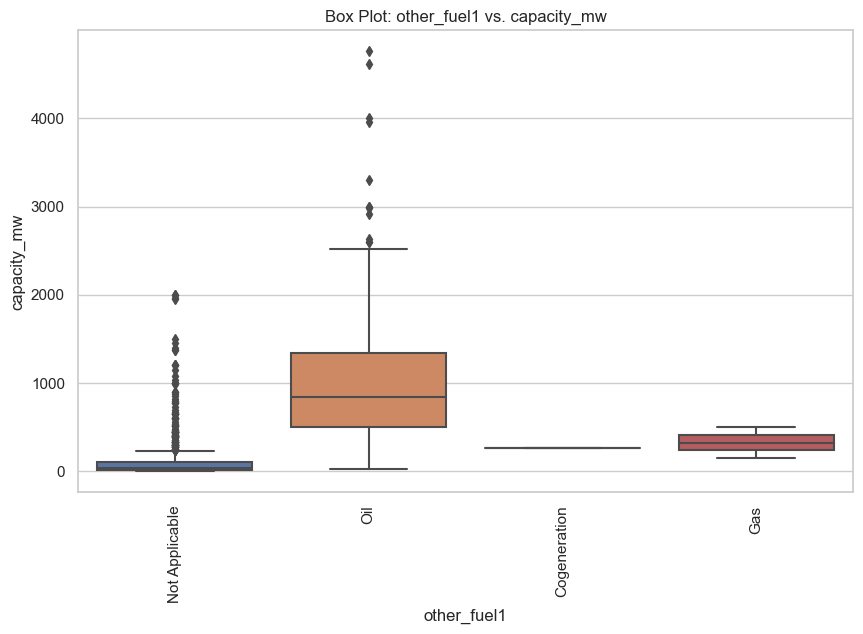

In [39]:
# Bivariate analysis using boxplot
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'other_fuel1', y = 'capacity_mw', data = df)
plt.title('Box Plot: other_fuel1 vs. capacity_mw')
plt.xticks(rotation = 90)
plt.xlabel('other_fuel1')
plt.ylabel('capacity_mw')
plt.show()

### Observations:
The box plot shows the distribution of power plant capacity ('capacity_mw') for various values of 'other_fuel1.' Each box represents a unique 'other_fuel1' category, and the height and spread of each box illustrate the range and variability of capacities within those categories.

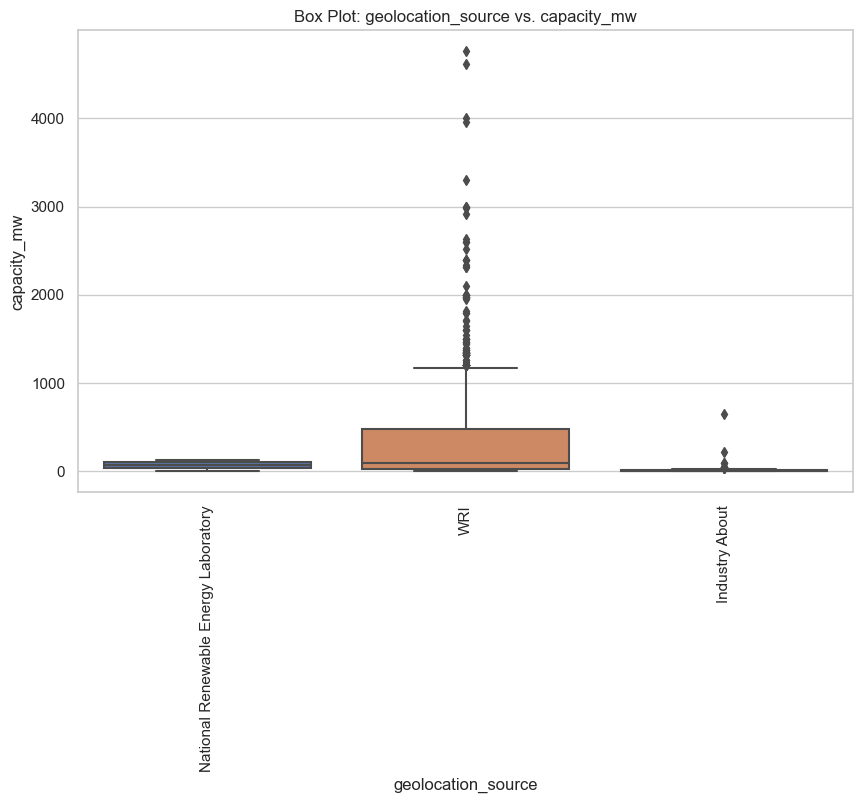

In [40]:
# Bivariate analysis using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'geolocation_source', y = 'capacity_mw', data = df)
plt.title('Box Plot: geolocation_source vs. capacity_mw')
plt.xticks(rotation = 90)
plt.xlabel('geolocation_source')
plt.ylabel('capacity_mw')
plt.show()

### Observations:
The box plot shows the distribution of power plant capacity ('capacity_mw') based on different 'geolocation_source' categories. Each box represents a distinct source of geolocation data, and the height and spread of each box depict the range and variability of capacities within those source categories.

#### Pair Plot

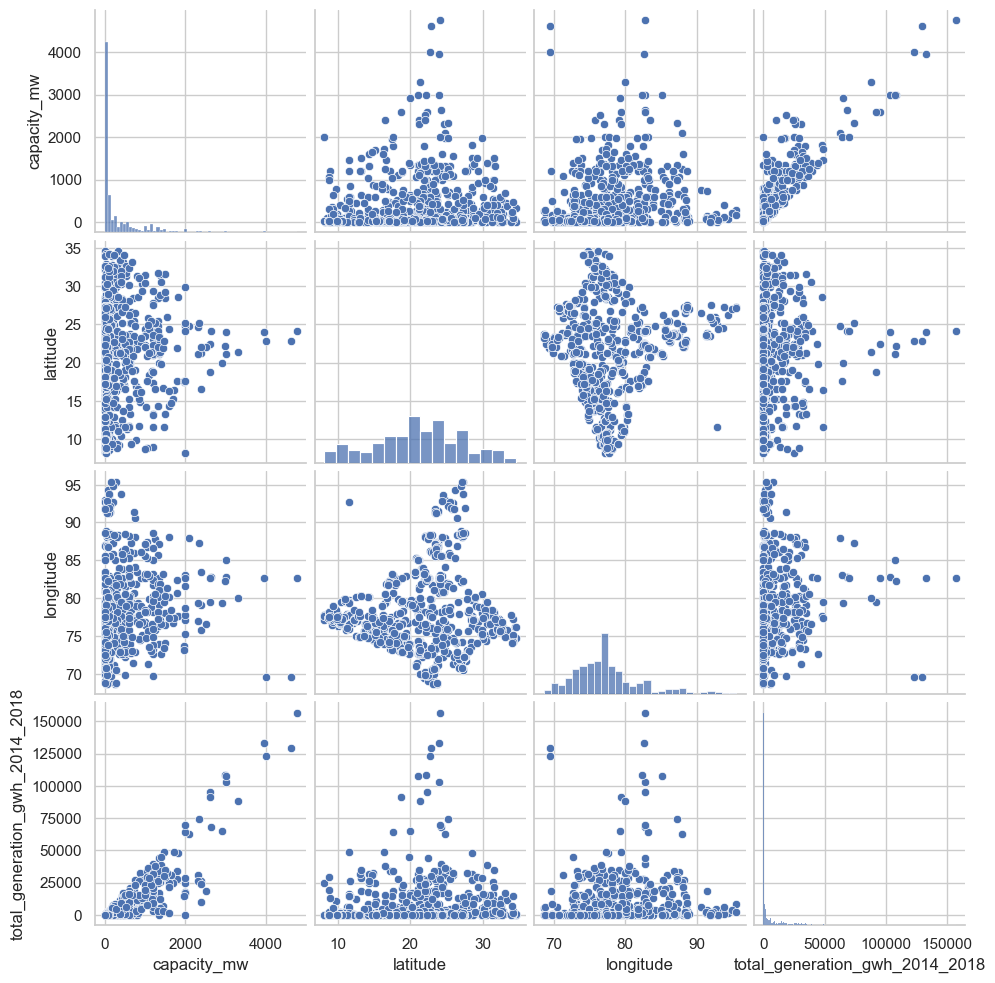

In [41]:
# Bivariate analysis using pairplot
columns_to_plot = ['capacity_mw', 'latitude', 'longitude', 'total_generation_gwh_2014_2018']

sns.pairplot(df[columns_to_plot])
plt.show()

### Observations:
The pairplot shows relationships between 'capacity_mw,' 'latitude,' 'longitude,' and 'total_generation_gwh_2014_2018'.

### Multivariate Analysis

### Scatter Plot

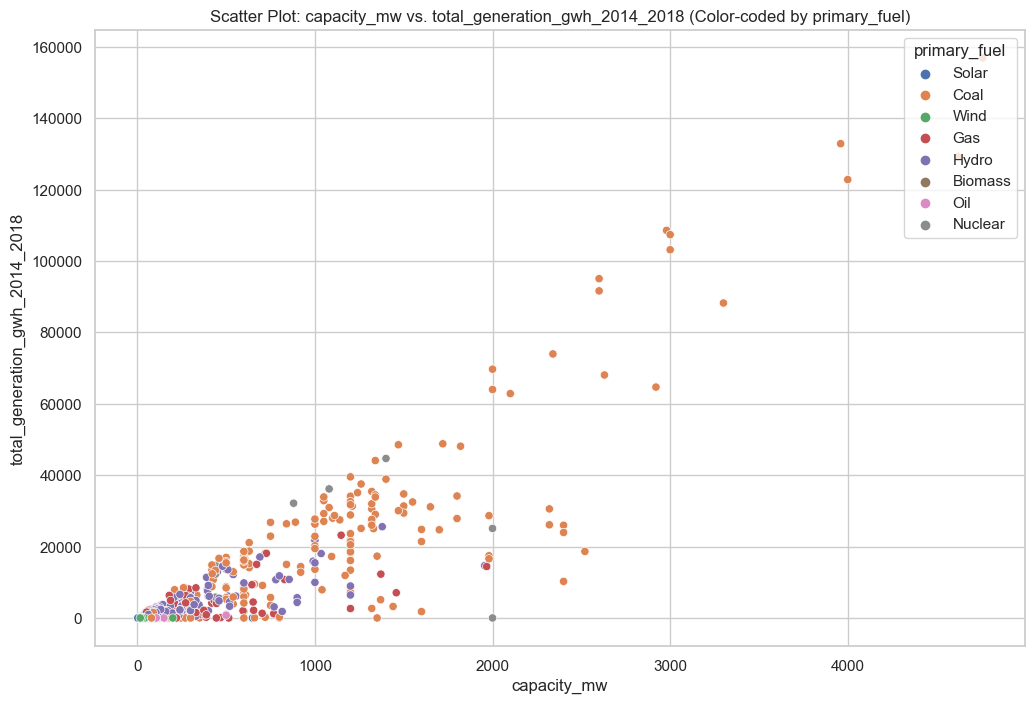

In [42]:
plt.figure(figsize = (12, 8))
sns.scatterplot(x = 'capacity_mw', y = 'total_generation_gwh_2014_2018', hue = 'primary_fuel', data = df)
plt.title('Scatter Plot: capacity_mw vs. total_generation_gwh_2014_2018 (Color-coded by primary_fuel)')
plt.xlabel('capacity_mw')
plt.ylabel('total_generation_gwh_2014_2018')
plt.legend(title = 'primary_fuel', loc = 'upper right')
plt.show()

### Observations:
Fuel Clusters: Data points of the same fuel type tend to cluster together.

Capacity Range: Different fuel types exhibit varying capacity ranges.

Total Generation: Total generation varies within each fuel type.

Outliers: Outliers may represent exceptional power plants.

Influence of Fuel: Insights into how primary fuel impacts capacity vs. total generation.

## Label Encoding

In [43]:
# Converting categorical columns into numerical columns
# List of categorical columns
categorical_columns = ['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']
encoder = LabelEncoder()
for i in categorical_columns:
    df[i] = encoder.fit_transform(df[i])

#### Target variable 'primary_fuel' has been encoded as follows: 
0 for 'Biomass' 

1 for 'Coal'

2 for 'Gas'

3 for 'Hydro'

4 for 'Nuclear'  

5 for 'Oil'

6 for 'Solar'

7 for 'Wind'

In [44]:
# Display dataset after updation
df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,total_generation_gwh_2014_2018
0,2.5,28.1839,73.2407,6,2,109,1,0.000000
1,98.0,24.7663,74.6090,1,2,174,2,0.000000
2,39.2,21.9038,69.3732,7,2,21,2,0.000000
3,135.0,23.8712,91.3602,2,2,22,2,3637.554320
4,1800.0,21.9603,82.4091,1,3,22,2,27859.499736


## Storing this dataset separately for building Primary Fuel Prediction and Capacity_MW Prediction models

In [45]:
# For classification task
df_c = df.copy()

# For regression task
df_r = df.copy()

# Building Primary Fuel Prediction model

## Features and Target variable for Primary Fuel Prediction:

### Features: 
'capacity_mw', 'latitude', 'longitude', 'other_fuel1', 'source', 'geolocation_source', 'total_generation_gwh_2014_2018'

### Target variable:
'primary_fuel'

In [46]:
# Display the dataset
df_c.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,total_generation_gwh_2014_2018
0,2.5,28.1839,73.2407,6,2,109,1,0.000000
1,98.0,24.7663,74.6090,1,2,174,2,0.000000
2,39.2,21.9038,69.3732,7,2,21,2,0.000000
3,135.0,23.8712,91.3602,2,2,22,2,3637.554320
4,1800.0,21.9603,82.4091,1,3,22,2,27859.499736


## Data Preprocessing 

### Checking for the outliers 

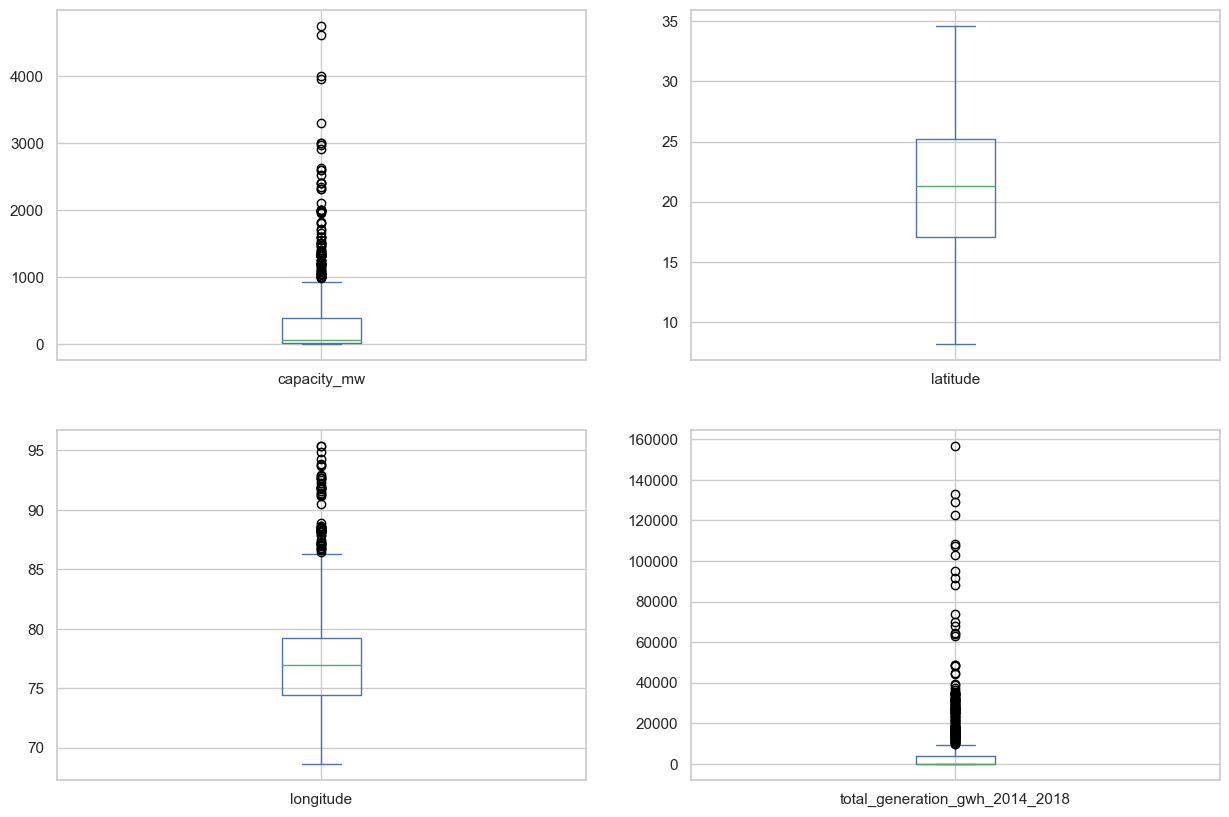

In [47]:
# Checking for the outliers using boxplot

# List of numerical columns
numerical_columns = ['capacity_mw', 'latitude', 'longitude', 'total_generation_gwh_2014_2018']

df_c[numerical_columns].plot(kind = 'box', subplots = True, figsize = (15, 10), layout = (2, 2))
plt.show()

### Observations:
Outliers are present in 'capacity_mw', 'longitude', and 'total_generation_gwh_2014_2018' columns.

In [48]:
# List of columns containing
columns_with_outliers = ['capacity_mw', 'longitude', 'total_generation_gwh_2014_2018' ]

In [49]:
# Checking for the outliers using Z-Score
z_score = abs(zscore(df_c[columns_with_outliers]))
z_score

,capacity_mw,longitude,total_generation_gwh_2014_2018
0,0.548908,0.878280,0.384832
1,0.386977,0.593788,0.384832
2,0.486679,1.682394,0.384832
3,0.324240,2.889052,0.147505
4,2.498942,1.027976,1.432823
...,...,...,...
902,2.159821,0.022477,0.268275
903,0.548060,0.145644,0.384832
904,0.509909,0.391673,0.384832
905,0.417498,0.772866,0.384832


In [50]:
# Identify the indices where the z-score is greater than 3
np.where(z_score > 3)

(array([ 15,  15, 143, 143, 147, 179, 183, 209, 209, 244, 308, 308, 323,
        333, 340, 360, 363, 364, 364, 375, 416, 427, 482, 493, 493, 494,
        494, 499, 519, 546, 577, 638, 648, 648, 657, 657, 695, 695, 721,
        724, 726, 726, 767, 786, 786, 788, 808, 808, 818, 847, 880, 880],
       dtype=int64),
 array([0, 2, 0, 2, 0, 1, 1, 0, 2, 1, 0, 2, 1, 1, 1, 1, 0, 0, 2, 0, 1, 1,
        0, 0, 2, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0,
        2, 0, 0, 2, 1, 1, 0, 2], dtype=int64))

In [51]:
# Removing Outliers
z = 3
updated_df_c = df_c[(z_score < z).all(axis = 1)]
updated_df_c

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,total_generation_gwh_2014_2018
0,2.5,28.1839,73.2407,6,2,109,1,0.000000
1,98.0,24.7663,74.6090,1,2,174,2,0.000000
2,39.2,21.9038,69.3732,7,2,21,2,0.000000
3,135.0,23.8712,91.3602,2,2,22,2,3637.554320
4,1800.0,21.9603,82.4091,1,3,22,2,27859.499736
...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,3,22,2,1786.491525
903,3.0,12.8932,78.1654,6,2,77,0,0.000000
904,25.5,15.2758,75.5811,7,2,21,2,0.000000
905,80.0,24.3500,73.7477,1,2,59,2,0.000000


In [52]:
# Checking the shape of dataframe after removing the outliers
updated_df_c.shape

(869, 8)

### Checking for the skewness

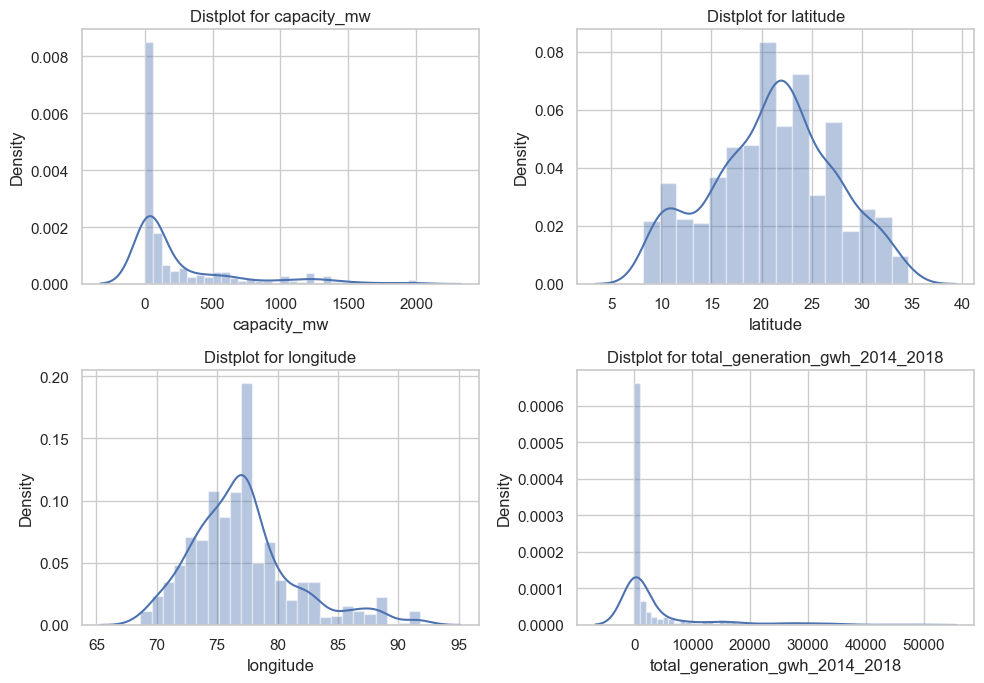

In [53]:
# Checking for the skewness using Dist plot 
ncol = 2
nrow = 2
plt.figure(figsize = (10, 7))

for i in range(0, len(numerical_columns)):
    plt.subplot(nrow, ncol, i+1)
    sns.distplot(updated_df_c[numerical_columns[i]]) 
    plt.title("Distplot for " + numerical_columns[i]) 
    plt.tight_layout()

plt.show()

### Observations:

'capacity_mw' appears to have a right-skewed distribution.

'latitude' shows a relatively symmetric distribution with no significant skewness.

'longitude' exhibits a slightly left-skewed distribution.

'total_generation_gwh_2014_2018' suggests a right-skewed distribution.

In [54]:
# Checking for the skewness using skew() method
updated_df_c[numerical_columns].skew()

capacity_mw                       2.013455
latitude                         -0.109190
longitude                         0.934362
total_generation_gwh_2014_2018    2.558210
dtype: float64

Skewness is present in 'capacity_mw' and 'total_generation_gwh_2914_2018' columns.

In [55]:
# List of the columns to be transformed
columns_to_transform = ['capacity_mw', 'total_generation_gwh_2014_2018']

# Copying data
updated_df_c2 = updated_df_c.copy()

# Reduing skewnees using yeojohnson Transformation
for column in columns_to_transform: 
    transformed_data, lambda_value = yeojohnson(updated_df_c[column] + 1)
    updated_df_c2[column] = transformed_data

In [56]:
updated_df_c2[columns_to_transform].skew()

capacity_mw                       0.036950
total_generation_gwh_2014_2018    0.285039
dtype: float64

Skewness in every column has been reduced, indicating a more balanced and symmetric distribution of data in each column.

In [57]:
# Display the updated dataset
updated_df_c2.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,total_generation_gwh_2014_2018
0,1.437496,28.1839,73.2407,6,2,109,1,0.665987
1,4.017820,24.7663,74.6090,1,2,174,2,0.665987
2,3.328862,21.9038,69.3732,7,2,21,2,0.665987
3,4.253637,23.8712,91.3602,2,2,22,2,5.288513
4,6.023458,21.9603,82.4091,1,3,22,2,5.988124


## Correlation Coefficient Matrix

In [58]:
# Checking the correalation coefficient matrix
correlation_coefficient = updated_df_c2.corr()
correlation_coefficient

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,total_generation_gwh_2014_2018
capacity_mw,1.000000,0.054243,0.326473,-0.518728,0.570483,-0.387992,0.467568,0.807233
latitude,0.054243,1.000000,-0.009754,-0.001102,0.050551,0.068247,-0.198890,0.097911
longitude,0.326473,-0.009754,1.000000,-0.373976,0.342868,-0.239596,0.267140,0.408815
primary_fuel,-0.518728,-0.001102,-0.373976,1.000000,-0.468546,0.038699,-0.478408,-0.479640
other_fuel1,0.570483,0.050551,0.342868,-0.468546,1.000000,-0.236776,0.190018,0.544763
source,-0.387992,0.068247,-0.239596,0.038699,-0.236776,1.000000,-0.499983,-0.449572
geolocation_source,0.467568,-0.198890,0.267140,-0.478408,0.190018,-0.499983,1.000000,0.360793
total_generation_gwh_2014_2018,0.807233,0.097911,0.408815,-0.479640,0.544763,-0.449572,0.360793,1.000000


Let's use the heatmap to visualize and interpret the correlation coefficient matrix.

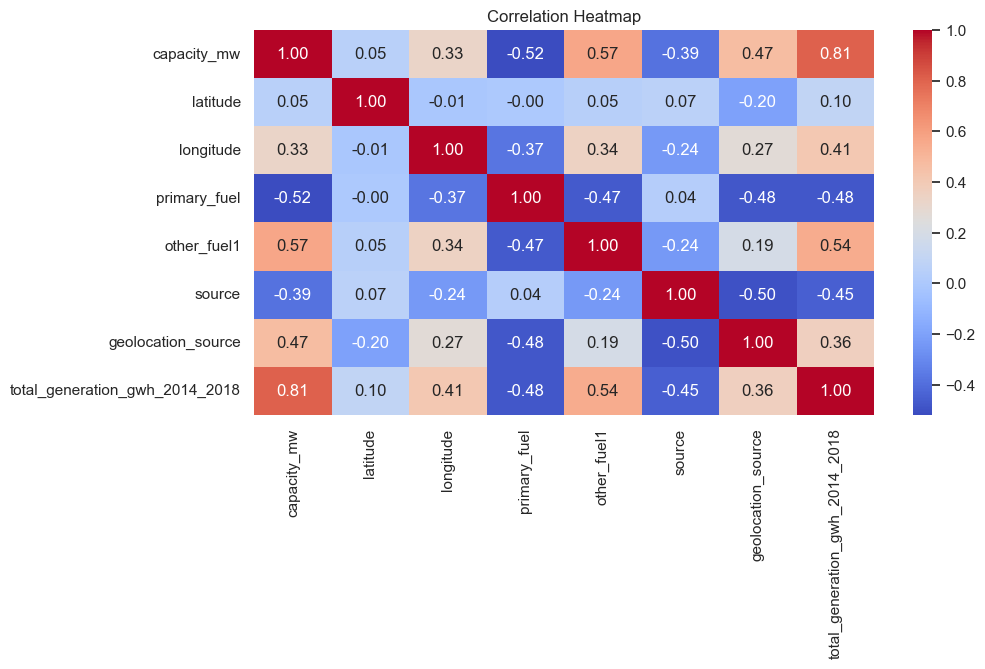

In [59]:
# Plotting the heatmap for correlation coefficient matrix
plt.figure(figsize = (10, 5))
sns.heatmap(correlation_coefficient, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title("Correlation Heatmap")
plt.show()

### Observations:

capacity_mw: This column represents the capacity of power stations in megawatts. It has a strong positive correlation with total_generation_gwh_2014_2018, suggesting that power stations with higher capacity tend to generate more electricity.

latitude and longitude: These columns represent the geographical coordinates of power stations. They have a positive correlation, which is expected since they both determine the location of a station.

primary_fuel: This categorical column represents the primary fuel type used in power generation. It has negative correlations with several other variables, indicating that the choice of primary fuel is somewhat inversely related to other factors like the source of data and geolocation source.

other_fuel1: This column might represent alternative fuel sources used in power generation. It has a strong positive correlation with capacity_mw, implying that power stations with more capacity are more likely to use alternative fuels.

source: This column represents the source of data for the power stations. It has negative correlations with several variables, including primary_fuel and geolocation_source, suggesting that the data source is somewhat independent of these factors.

geolocation_source: This column represents the source of geolocation information. It has a positive correlation with other_fuel1, indicating that the geolocation source may be related to the use of alternative fuels.

total_generation_gwh_2014_2018: This column represents the total electricity generation (in gigawatt-hours) from 2014 to 2018. It has strong positive correlations with capacity_mw, other_fuel1, and geolocation_source, suggesting that higher capacity, alternative fuels, and specific geolocation sources are associated with greater electricity generation.

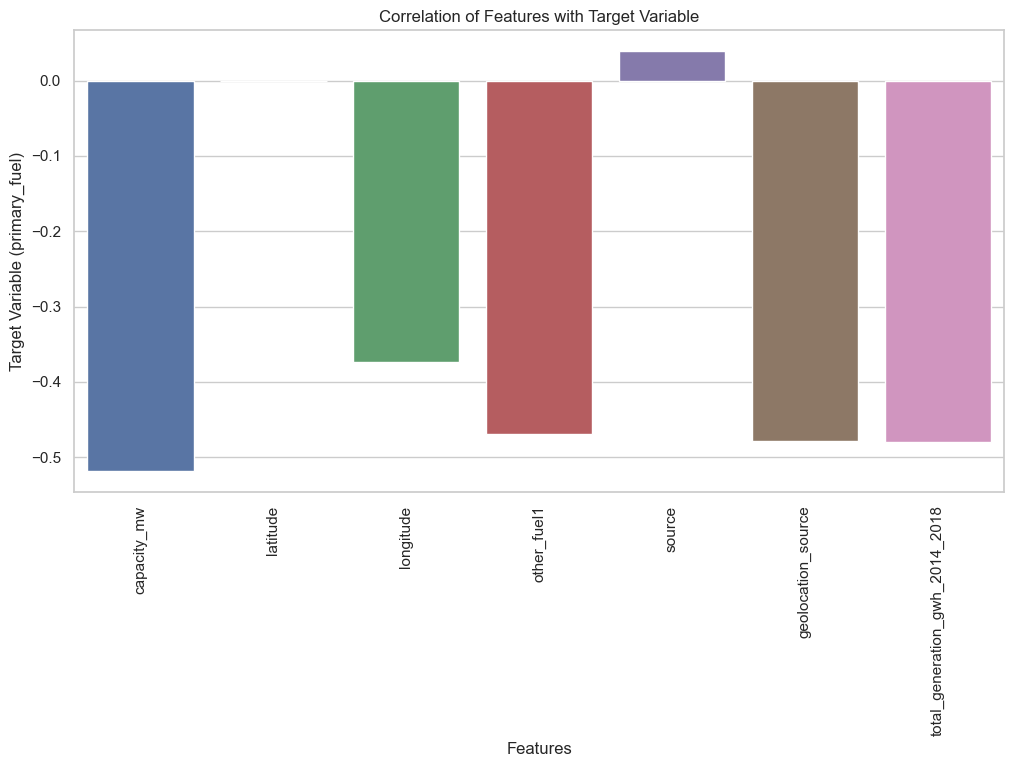

In [60]:
# Checking for the correlation between features and target variable separately
target = 'primary_fuel'

correlation_matrix = updated_df_c2.corr()
correlations_with_target = correlation_matrix[target].drop(target)

plt.figure(figsize=(12, 6))
sns.barplot(x = correlations_with_target.index, y = correlations_with_target.values)
plt.xlabel('Features')
plt.ylabel('Target Variable (primary_fuel)')
plt.title('Correlation of Features with Target Variable')
plt.xticks(rotation = 90)

plt.show()

### Observations:

capacity_mw: The capacity of power stations has a negative correlation (-0.518728) with the 'primary_fuel' variable. This suggests that the type of primary fuel used in power stations tends to differ depending on their capacity. Power stations with higher capacity may be less likely to use certain types of primary fuel.

latitude and longitude: The geographical coordinates of power stations, represented by 'latitude' and 'longitude' have very weak correlations with "primary_fuel" (close to zero). This implies that the choice of primary fuel is not strongly influenced by the geographic location of the power station.

other_fuel1: The use of alternative fuels, as represented by 'other_fuel1' has a positive correlation (0.570483) with the type of primary fuel. This suggests that power stations using alternative fuels as their primary source of energy tend to have a specific choice of primary fuel as well.

source: The source of data for power stations has a negative correlation (-0.387992) with 'primary_fuel'. This indicates that the type of primary fuel used may vary depending on the data source. Different data sources might report different primary fuel types for the same power station.

geolocation_source: The source of geolocation information, represented by 'geolocation_source' has a positive correlation (0.467568) with 'primary_fuel'. This implies that the choice of primary fuel may be influenced by the source of geolocation data. Power stations with specific geolocation sources may be more likely to use certain types of primary fuel.

total_generation_gwh_2014_2018: The total electricity generation from 2014 to 2018 has a negative correlation (-0.479640) with 'primary_fuel'. This suggests that the type of primary fuel used in power stations may impact the total electricity generation. Power stations with certain primary fuels may generate more or less electricity during this time period.

## Feature Engineering

### Feature Scaling

In [61]:
# Extracting features and target from the dataset
features = updated_df_c2.drop(columns = 'primary_fuel')
target = updated_df_c2['primary_fuel']

In [62]:
# Performing standard scaling on the features
scaler = StandardScaler()
scaled_df = scaler.fit_transform(features)

In [63]:
# Creating a DataFrame 'updated_features' to store the scaled data using 'scaled_df'
updated_features = pd.DataFrame(scaled_df, columns = features.columns[:])
updated_features.head()

,capacity_mw,latitude,longitude,other_fuel1,source,geolocation_source,total_generation_gwh_2014_2018
0,-1.665831,1.151788,-0.894634,-0.472429,1.419501,-1.054141,-0.897012
1,0.251516,0.596093,-0.577065,-0.472429,2.854499,0.402216,-0.897012
2,-0.260424,0.130656,-1.792243,-0.472429,-0.523265,0.402216,-0.897012
3,0.426743,0.450551,3.310727,-0.472429,-0.501189,0.402216,1.104609
4,1.741833,0.139843,1.233263,1.971264,-0.501189,0.402216,1.407551


## Checking for the Variane Inflation Factor

In [64]:
# Calculate VIF for each column
vif_data = pd.DataFrame()
vif_data["Features"] = updated_features.columns
vif_data["VIF"] = [variance_inflation_factor(updated_features.values, i) for i in range(updated_features.shape[1])]

# Print the VIF data
print(vif_data)

                         Features       VIF
0                     capacity_mw  3.551978
1                        latitude  1.081423
2                       longitude  1.271423
3                     other_fuel1  1.599006
4                          source  1.514950
5              geolocation_source  1.677352
6  total_generation_gwh_2014_2018  3.417726


The VIF values for all the features fall within a certain range.

In [65]:
# Storing the features and target variables in X1 and y1
X1 = updated_features
y1 = target

##  Checking for the Class Imbalance problem

In [66]:
y1.value_counts()

3    240
1    236
6    126
7    123
2     65
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

Class imbalance problem is present in the dataset.

In [67]:
# Fixing class imbalance problem using oversampling method
smote = SMOTE()
X, y = smote.fit_resample(X1, y1)

In [68]:
# Again checking the values after applying oversampling method
y.value_counts()

6    240
1    240
7    240
2    240
3    240
0    240
5    240
4    240
Name: primary_fuel, dtype: int64

Now all the classes are balanced.

In [69]:
# Function to find the best random state
def find_best_random_state(X, y, iterations = 100):
    max_accuracy_score = 0
    max_random_state = 0
    
    for i in range(1, iterations + 1):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = i)
        rfc = RandomForestClassifier()
        rfc.fit(X_train, y_train)
        pred = rfc.predict(X_test)
        accuracy = accuracy_score(y_test, pred)
        
        if accuracy > max_accuracy_score:
            max_accuracy_score = accuracy
            max_random_state = i 
    
    return max_accuracy_score, max_random_state

# Calling the function to find the best random state
best_accuracy_score, best_random_state = find_best_random_state(X, y)

print("Best Accuracy score is", best_accuracy_score, "at random state", best_random_state)

Best Accuracy score is 0.9739583333333334 at random state 33


## Spliting dataset into training and testing sets

In [70]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = best_random_state)

## Different Models for predicting Primary Fuel 

In [71]:
# List of names of the models
models_name = ['Logistic Regression', 'K-Nearest Neighbors', 'Gaussian Naive Bayes', 'Support Vector Classifier', 
               'Decision Tree Classifier', 'Random Forest Classifier', 'Extra Trees Classifier', 
               'Gradient Boosting Classifier', 'AdaBoost Classifier', 'Bagging Classifier', 'XGBoost Classifier']

In [72]:
# List of machine learning models
models = [
    LogisticRegression(),             # Logistic Regression
    KNeighborsClassifier(),           # k-Nearest Neighbors
    GaussianNB(),                     # Gaussian Naive Bayes
    SVC(),                            # Support Vector Classifier
    DecisionTreeClassifier(),         # Decision Tree Classifier
    RandomForestClassifier(),         # Random Forest Classifier
    ExtraTreesClassifier(),           # Extra Trees Classifier
    GradientBoostingClassifier(),     # Gradient Boosting Classifier
    AdaBoostClassifier(),             # AdaBoost Classifier
    BaggingClassifier(),              # Bagging Classifier
    xgb.XGBClassifier()               # XGBoost Classifier
]

In [73]:
models_accuracy_score = [] # List for storing accuracy score of each model
i = 0
for model in models:
    print(models_name[i])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)*100
    models_accuracy_score.append(accuracy)
    print("Accuracy score:", accuracy)
    print("Classifiction report:\n", classification_report(y_test, y_pred))
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
    print('\n\n')
    i += 1

Logistic Regression
Accuracy score: 75.26041666666666
Classifiction report:
               precision    recall  f1-score   support

           0       0.79      0.91      0.85        46
           1       0.94      0.80      0.86        60
           2       0.57      0.40      0.47        40
           3       0.59      0.62      0.60        42
           4       0.79      0.78      0.78        49
           5       0.68      0.56      0.61        48
           6       1.00      1.00      1.00        58
           7       0.55      0.83      0.66        41

    accuracy                           0.75       384
   macro avg       0.74      0.74      0.73       384
weighted avg       0.76      0.75      0.75       384

Confusion matrix:
 [[42  0  0  0  0  1  0  3]
 [ 4 48  0  2  0  2  0  4]
 [ 0  1 16 11  6  6  0  0]
 [ 1  0  2 26  4  0  0  9]
 [ 0  0 10  0 38  1  0  0]
 [ 6  2  0  1  0 27  0 12]
 [ 0  0  0  0  0  0 58  0]
 [ 0  0  0  4  0  3  0 34]]



K-Nearest Neighbors
Accuracy scor

Accuracy score: 96.09375
Classifiction report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        46
           1       0.95      0.97      0.96        60
           2       0.90      0.93      0.91        40
           3       0.95      0.90      0.93        42
           4       0.96      0.96      0.96        49
           5       0.92      0.96      0.94        48
           6       1.00      1.00      1.00        58
           7       1.00      1.00      1.00        41

    accuracy                           0.96       384
   macro avg       0.96      0.96      0.96       384
weighted avg       0.96      0.96      0.96       384

Confusion matrix:
 [[44  2  0  0  0  0  0  0]
 [ 0 58  0  0  1  1  0  0]
 [ 0  1 37  1  0  1  0  0]
 [ 0  0  1 38  1  2  0  0]
 [ 0  0  1  1 47  0  0  0]
 [ 0  0  2  0  0 46  0  0]
 [ 0  0  0  0  0  0 58  0]
 [ 0  0  0  0  0  0  0 41]]





Logistic Regression: The Logistic Regression model shows an accuracy of 75.26%, indicating that it performs reasonably well in classifying data. However, it might have limitations in handling some classes based on the precision and recall scores for different classes.

K-Nearest Neighbors (KNN): K-Nearest Neighbors demonstrates strong classification performance with an accuracy of 89.06%. Overall, it performs well, as evidenced by high precision and recall values for most classes. This suggests that KNN is a reliable choice for classification tasks, especially when classifying data into multiple categories.

Gaussian Naive Bayes: The Gaussian Naive Bayes model exhibits an accuracy of 61.98%, which is lower compared to other models. It appears to struggle with some classes, especially those with low precision and recall values. While Naive Bayes models are computationally efficient.

Support Vector Classifier (SVC): The Support Vector Classifier performs well with an accuracy of 84.11%. However, it seems to have difficulty with certain classes based on precision and recall scores.

Decision Tree Classifier: The Decision Tree Classifier boasts a high accuracy of 94.01%, making it a strong performer overall. It achieves high precision and recall values for most classes, suggesting that it's a reliable choice for classification tasks, especially when interpretability is crucial.

Random Forest Classifier: The Random Forest Classifier performs exceptionally well with an accuracy of 96.61%. It exhibits high precision for most classes, indicating its robustness in handling complex classification problems. Random Forest is often a top choice for a wide range of classification tasks.

Extra Trees Classifier: Extra Trees Classifier outshines with an accuracy of 98.18%, making it one of the top-performing models. It achieves high accuracy and precision for all classes, demonstrating its capability to handle diverse and challenging datasets effectively.

Gradient Boosting Classifier: The Gradient Boosting Classifier delivers an accuracy of 93.75% and exhibits good precision and recall values. It is a reliable choice for classification tasks, especially when achieving a balance between accuracy and interpretability is essential.

AdaBoost Classifier: AdaBoost Classifier appears to perform poorly compared to other models, with an accuracy of 38.54%. Its lower accuracy score indicates its limitations, especially for complex datasets. 

Bagging Classifier: The Bagging Classifier demonstrates strong classification performance with an accuracy of 94.79%. It achieves high precision and recall values for most classes, making it a robust choice for various classification tasks.

XGBoost Classifier: XGBoost Classifier performs very well with an accuracy of 96.09%. It exhibits high accuracy and precision for most classes, showcasing its effectiveness in handling classification tasks, especially when accuracy is crucial.

## Cross Validation

In [74]:
i = 0
diff_acc_cv = [] # List for storing difference between the accuracy score and the mean of cross validation scores
for model in models:
    print(models_name[i])
    print("Accuracy Score:", models_accuracy_score[i])
    cv_score = cross_val_score(model, X, y)
    print("Cross Validation Scores:", cv_score*100)
    print("Mean of Cross Validation Scores:", cv_score.mean()*100)
    diff = models_accuracy_score[i] - cv_score.mean()*100
    print("Difference between Accuracy Score and Cross Validation Score:", diff)
    diff_acc_cv.append(diff)
    print('\n')
    i += 1

Logistic Regression
Accuracy Score: 75.26041666666666
Cross Validation Scores: [69.53125    71.61458333 67.70833333 72.13541667 70.83333333]
Mean of Cross Validation Scores: 70.36458333333334
Difference between Accuracy Score and Cross Validation Score: 4.895833333333314


K-Nearest Neighbors
Accuracy Score: 89.0625
Cross Validation Scores: [86.45833333 89.0625     87.5        89.58333333 88.54166667]
Mean of Cross Validation Scores: 88.22916666666669
Difference between Accuracy Score and Cross Validation Score: 0.8333333333333144


Gaussian Naive Bayes
Accuracy Score: 61.979166666666664
Cross Validation Scores: [58.33333333 59.89583333 60.15625    60.67708333 60.15625   ]
Mean of Cross Validation Scores: 59.84374999999999
Difference between Accuracy Score and Cross Validation Score: 2.1354166666666714


Support Vector Classifier
Accuracy Score: 84.11458333333334
Cross Validation Scores: [79.42708333 83.33333333 79.6875     80.46875    80.98958333]
Mean of Cross Validation Scores: 80.7

Logistic Regression:
The Logistic Regression model achieved an accuracy score of 75.26%, indicating its ability to make correct predictions. The 4.90% difference between the accuracy and cross-validation scores implies that the model may not be as stable as desired, potentially requiring further tuning or exploration.

K-Nearest Neighbors (KNN):
The K-Nearest Neighbors model performed impressively with an accuracy score of 89.06%. The small 0.83% difference between accuracy and cross-validation scores signifies that KNN is a robust and reliable classifier for this problem.

Gaussian Naive Bayes:
Gaussian Naive Bayes yielded an accuracy score of 61.98%, indicating some level of predictive capability. However, the 2.14% difference between the two scores suggest potential instability or suboptimal performance on different data splits.

Support Vector Classifier (SVC):
The Support Vector Classifier achieved a respectable accuracy score of 84.11%. The 3.33% difference between accuracy and cross-validation scores indicate some variability in its performance. 

Decision Tree Classifier:
The Decision Tree Classifier displayed a strong accuracy score of 94.01%, indicating its ability to capture patterns in the data. The 3.65% difference between accuracy and cross-validation scores implies that the model is fairly stable but could still benefit from minor adjustments.

Random Forest Classifier:
With an impressive accuracy score of 96.61%, the Random Forest Classifier excelled in making accurate predictions. The 2.03% difference between the two scores demonstrate its robustness and reliability. This model appears to be well-suited for the task.

Extra Trees Classifier:
The Extra Trees Classifier outperformed many models with an accuracy score of 98.18%. The 3.13% difference between accuracy and cross-validation scores suggest consistent and reliable performance. This classifier appears to be a strong choice for the task at hand.

Gradient Boosting Classifier:
The Gradient Boosting Classifier achieved an accuracy score of 93.75%, indicating its competence in making accurate predictions. The small 0.63% difference between accuracy and cross-validation scores indicates that this model is stable and dependable.

AdaBoost Classifier:
AdaBoost presented an accuracy score of 38.54%, which is relatively low. The small 0.31% difference between the two scores indicate stable performance, albeit at a lower accuracy level. 

Bagging Classifier:
The Bagging Classifier performed well with an accuracy score of 94.79%. The 2.03% difference between the two scores suggest consistent and reliable performance. This model appears to be a strong contender for the task.

XGBoost Classifier:
XGBoost achieved an accuracy score of 96.09%, showcasing its strong predictive capabilities. The 1.35% difference between accuracy and cross-validation scores indicate a model that is both accurate and stable. XGBoost is a strong candidate for this classification problem.

In [75]:
# Storing the performance summary of all the models
models_performance = pd.DataFrame({'Model': models_name, 
                                   'Accurccy Score': models_accuracy_score, 
                                   'Difference: Accuracy Score & CV Score': diff_acc_cv})

In [76]:
models_performance

,Model,Accurccy Score,Difference: Accuracy Score & CV Score
0,Logistic Regression,75.260417,4.895833
1,K-Nearest Neighbors,89.062500,0.833333
2,Gaussian Naive Bayes,61.979167,2.135417
3,Support Vector Classifier,84.114583,3.333333
4,Decision Tree Classifier,94.010417,3.645833
5,Random Forest Classifier,96.614583,2.031250
6,Extra Trees Classifier,98.177083,3.125000
7,Gradient Boosting Classifier,93.750000,0.625000
8,AdaBoost Classifier,38.541667,0.312500
9,Bagging Classifier,94.791667,2.031250


## Final Model
After careful evaluation, the Extra Trees Classifier stands out as the best model with an accuracy score of 98.18%, the Extra Tress Classifier exhibits strong performance in fitting the training data. Additionally, the difference between the accuracy score and the mean of cross-validation scores is minimal at 3.64%, suggesting that the model maintains stability and accuracy. This balance between accuracy and stability makes the Extra Trees Classifier a prudent choice for the final model.

## Hyper Parameter Tuning

In [77]:
# Parameters grid for hyper parameter tuning
parameters_grid = {
    'n_estimators': [100, 200, 300],  # Number of decision trees in the ensemble
    'max_depth': [10, 20, 30],      # Maximum depth of each decision tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]     # Minimum number of samples required to be at a leaf node
}

In [78]:
# Using grid search CV for enhancing the model performance
grid_search_cv = GridSearchCV(ExtraTreesClassifier(), param_grid = parameters_grid, cv = 5, scoring = 'accuracy')

In [79]:
# Performing grid search to find the best hyperparameters for the model
grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [80]:
# Retrieving the best hyperparameters found during grid search
grid_search_cv.best_params_

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [81]:
# Storing the best parameters
best_params = grid_search_cv.best_params_

In [82]:
# Retrieving the best mean cross-validated score achieved during grid search
grid_search_cv.best_score_

0.9355493041160793

In [83]:
# Creating final model
final_model = ExtraTreesClassifier(**best_params)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy*100)

97.91666666666666


#### Final model has given accuracy score 97.92%.

## Saving Final Model

In [84]:
# Saving the model 
joblib.dump(final_model, "Global_Power_Plant_Primary_Fuel_Prediction_Model.pkl")

['Global_Power_Plant_Primary_Fuel_Prediction_Model.pkl']

In [85]:
# Loading the saved model
model = joblib.load("Global_Power_Plant_Primary_Fuel_Prediction_Model.pkl")

# Predicting values
predicted_values = model.predict(X_test)

In [86]:
# Saving the actual values
actual_values = np.array(y_test)

In [87]:
# Comparing the actual and predicted values
actual_vs_predicted = pd.DataFrame({'Actual Vlaues' : actual_values , 'Predicted Values' : predicted_values})
actual_vs_predicted

,Actual Vlaues,Predicted Values
0,6,6
1,3,3
2,5,5
3,0,0
4,4,4
...,...,...
379,1,1
380,6,6
381,3,3
382,1,2


Here, 0 denotes 'Biomass', 1 denotes 'Coal', 2 denotes 'Gas', 3 denotes 'Hydro', 4 denotes 'Nuclear', 5 denotes 'Oil', 6 denotes 'Solar', and 7 denotes 'Wind'.

# Building Capacity_MW Prediction model

## Features and Target variable for Primary Fuel Prediction:

### Features: 
'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'source', 'geolocation_source', 'total_generation_gwh_2014_2018'

### Target variable:
'capacity_mw'

In [88]:
# Display the dataset
df_r.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,total_generation_gwh_2014_2018
0,2.5,28.1839,73.2407,6,2,109,1,0.000000
1,98.0,24.7663,74.6090,1,2,174,2,0.000000
2,39.2,21.9038,69.3732,7,2,21,2,0.000000
3,135.0,23.8712,91.3602,2,2,22,2,3637.554320
4,1800.0,21.9603,82.4091,1,3,22,2,27859.499736


## Data Preprocessing

### Checking for the Outliers

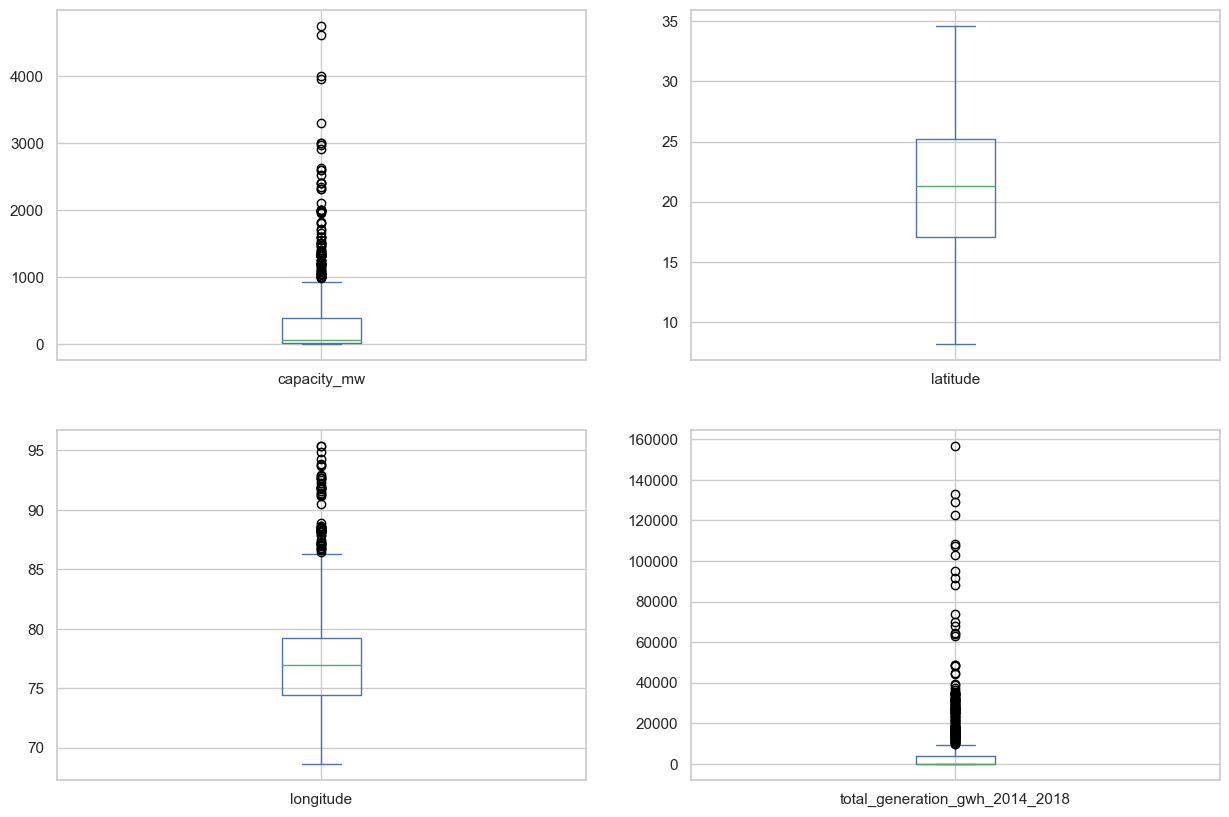

In [89]:
# Checking for the outliers using boxplot

# List of numerical columns
numerical_columns = ['capacity_mw', 'latitude', 'longitude', 'total_generation_gwh_2014_2018'] 

df_r[numerical_columns].plot(kind = 'box', subplots = True, figsize = (15, 10), layout = (2, 2))
plt.show()

### Observations:
Outliers are present in 'capacity_mw', 'longitude', and 'total_generation_gwh_2014_2018' columns but 'capacity_mw' is target variable so, it will not be considered for outliers removal.

In [90]:
# List of columns containing
columns_with_outliers = ['longitude', 'total_generation_gwh_2014_2018']

In [91]:
# Checking for the outliers using Z-Score
z_score = abs(zscore(df_r[columns_with_outliers]))
z_score

,longitude,total_generation_gwh_2014_2018
0,0.878280,0.384832
1,0.593788,0.384832
2,1.682394,0.384832
3,2.889052,0.147505
4,1.027976,1.432823
...,...,...
902,0.022477,0.268275
903,0.145644,0.384832
904,0.391673,0.384832
905,0.772866,0.384832


In [92]:
# # Identify the indices where the z-score is greater than 3
np.where(z_score > 3)

(array([ 15, 143, 179, 183, 209, 244, 308, 323, 333, 340, 360, 364, 416,
        427, 493, 494, 499, 519, 546, 577, 638, 648, 657, 695, 721, 724,
        726, 786, 808, 818, 847, 880], dtype=int64),
 array([1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 1], dtype=int64))

In [93]:
# Removing Outliers
z = 3
updated_df_r = df_r[(z_score < z).all(axis = 1)]
updated_df_r

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,total_generation_gwh_2014_2018
0,2.5,28.1839,73.2407,6,2,109,1,0.000000
1,98.0,24.7663,74.6090,1,2,174,2,0.000000
2,39.2,21.9038,69.3732,7,2,21,2,0.000000
3,135.0,23.8712,91.3602,2,2,22,2,3637.554320
4,1800.0,21.9603,82.4091,1,3,22,2,27859.499736
...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,3,22,2,1786.491525
903,3.0,12.8932,78.1654,6,2,77,0,0.000000
904,25.5,15.2758,75.5811,7,2,21,2,0.000000
905,80.0,24.3500,73.7477,1,2,59,2,0.000000


In [94]:
# Checking the shape of dataframe after removing the outliers
updated_df_r.shape

(875, 8)

### Checking for the skewness

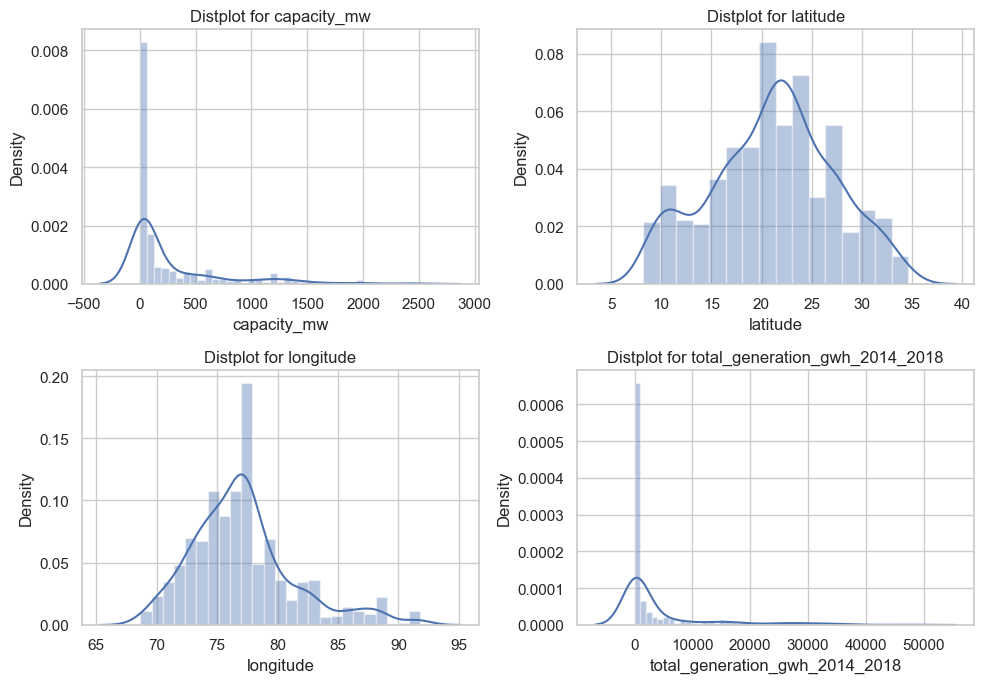

In [95]:
# Checking for the skewness using Dist plot  
rows = 2
columns = 2
plt.figure(figsize = (10, 7))

for i in range(0, len(numerical_columns)):
    plt.subplot(rows, columns, i+1)
    sns.distplot(updated_df_r[numerical_columns[i]]) 
    plt.title("Distplot for " + numerical_columns[i]) 
    plt.tight_layout()

plt.show()

### Observations:

'capacity_mw' appears to have a right-skewed distribution.

'latitude' shows a relatively symmetric distribution with no significant skewness.

'longitude' exhibits a slightly left-skewed distribution.

'total_generation_gwh_2014_2018' suggests a right-skewed distribution.

In [96]:
# Checking for the skewness using skew() method
updated_df_r[numerical_columns].skew()

capacity_mw                       2.189300
latitude                         -0.110280
longitude                         0.930045
total_generation_gwh_2014_2018    2.480133
dtype: float64

Skewness is present in 'capacity_mw' and 'total_generation_gwh_2914_2018' columns but 'capacity_mw' is target variable so, it will not be considered for skewness reduction.

In [97]:
# List of the columns to be transformed
columns_to_transform = ['total_generation_gwh_2014_2018']

# Copying data
updated_df_r2 = updated_df_r.copy()

# Reduing skewnees using yeojohnson Transformation
for column in columns_to_transform: 
    transformed_data, lambda_value = yeojohnson(updated_df_r[column] + 1)
    updated_df_r2[column] = transformed_data

In [98]:
# Again checking the skewness
updated_df_r2[columns_to_transform].skew()

total_generation_gwh_2014_2018    0.273484
dtype: float64

Skewness in 'total_generation_gwh_2014_2018' column has been reduced, indicating a more balanced and symmetric distribution of data in column.

## Correlation Coeffiecient Matrix

In [99]:
# Checking the correalation coefficient matrix
correlation_coefficient = updated_df_r2.corr()
correlation_coefficient

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,total_generation_gwh_2014_2018
capacity_mw,1.000000,0.045495,0.241939,-0.398651,0.629975,-0.267975,0.228151,0.654150
latitude,0.045495,1.000000,-0.009221,-0.001306,0.050275,0.068046,-0.198587,0.097944
longitude,0.241939,-0.009221,1.000000,-0.374425,0.342371,-0.240172,0.267501,0.408619
primary_fuel,-0.398651,-0.001306,-0.374425,1.000000,-0.474009,0.041914,-0.479266,-0.484381
other_fuel1,0.629975,0.050275,0.342371,-0.474009,1.000000,-0.240162,0.192795,0.553533
source,-0.267975,0.068046,-0.240172,0.041914,-0.240162,1.000000,-0.500656,-0.450680
geolocation_source,0.228151,-0.198587,0.267501,-0.479266,0.192795,-0.500656,1.000000,0.361793
total_generation_gwh_2014_2018,0.654150,0.097944,0.408619,-0.484381,0.553533,-0.450680,0.361793,1.000000


Let's use the heatmap to visualize and interpret the correlation coefficient matrix.

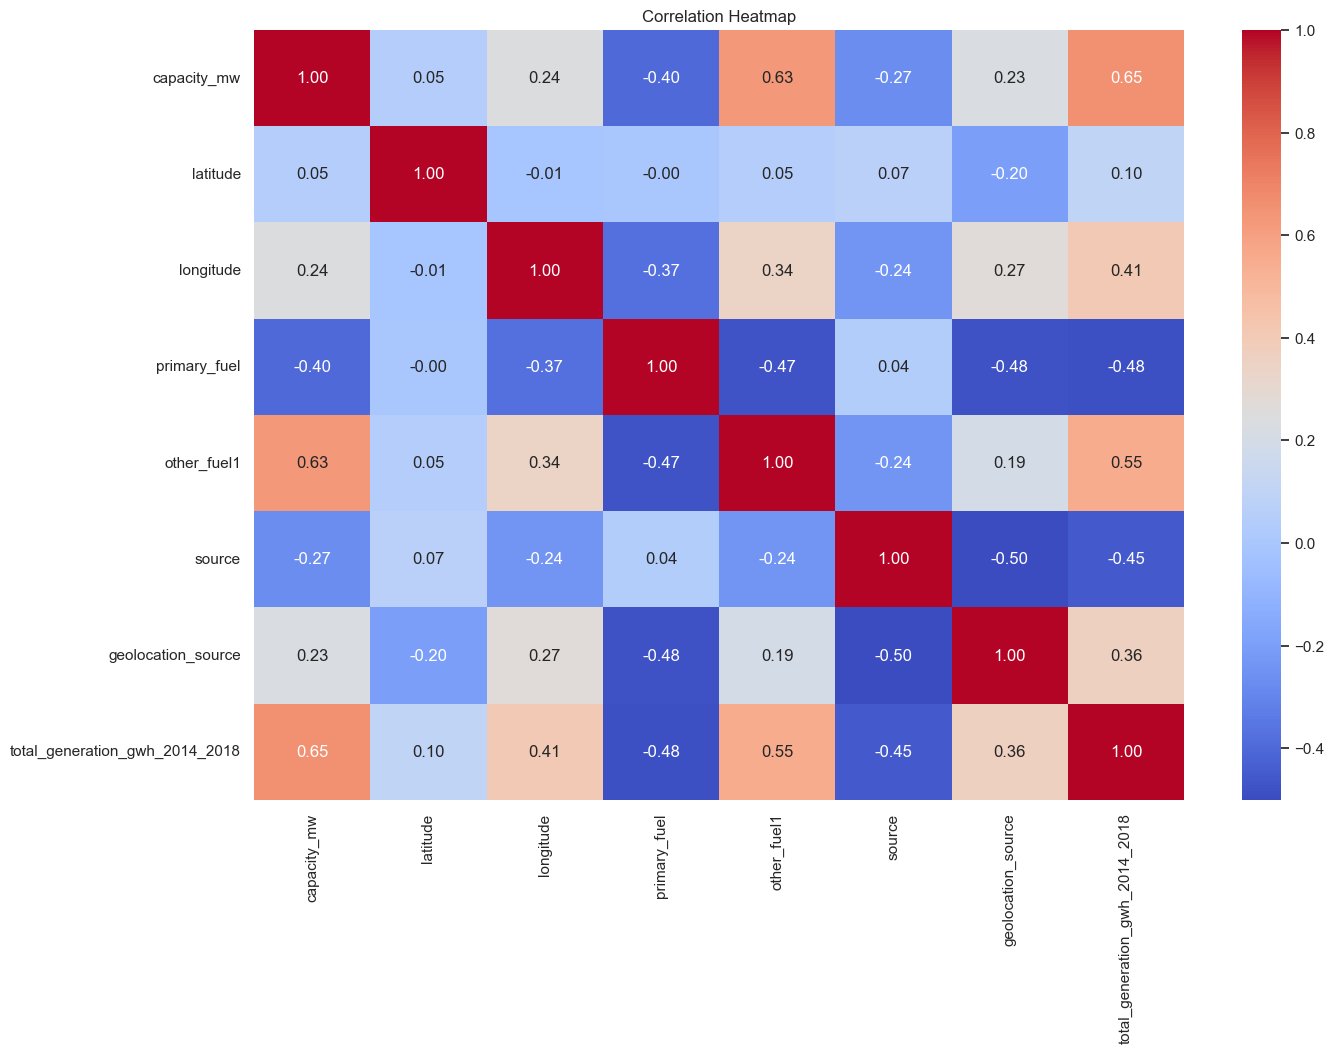

In [100]:
# Plotting the heatmap for correlation coefficient matrix
plt.figure(figsize = (15, 10))
sns.heatmap(correlation_coefficient, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title("Correlation Heatmap")
plt.show()

### Observations:

capacity_mw: This column represents the capacity of power stations in megawatts. It has a strong positive correlation with total_generation_gwh_2014_2018, suggesting that power stations with higher capacity tend to generate more electricity.

latitude and longitude: These columns represent the geographical coordinates of power stations. They have a positive correlation, which is expected since they both determine the location of a station.

primary_fuel: This categorical column represents the primary fuel type used in power generation. It has negative correlations with several other variables, indicating that the choice of primary fuel is somewhat inversely related to other factors like the source of data and geolocation source.

other_fuel1: This column might represent alternative fuel sources used in power generation. It has a strong positive correlation with capacity_mw, implying that power stations with more capacity are more likely to use alternative fuels.

source: This column represents the source of data for the power stations. It has negative correlations with several variables, including primary_fuel and geolocation_source, suggesting that the data source is somewhat independent of these factors.

geolocation_source: This column represents the source of geolocation information. It has a positive correlation with other_fuel1, indicating that the geolocation source may be related to the use of alternative fuels.

total_generation_gwh_2014_2018: This column represents the total electricity generation (in gigawatt-hours) from 2014 to 2018. It has strong positive correlations with capacity_mw, other_fuel1, and geolocation_source, suggesting that higher capacity, alternative fuels, and specific geolocation sources are associated with greater electricity generation.

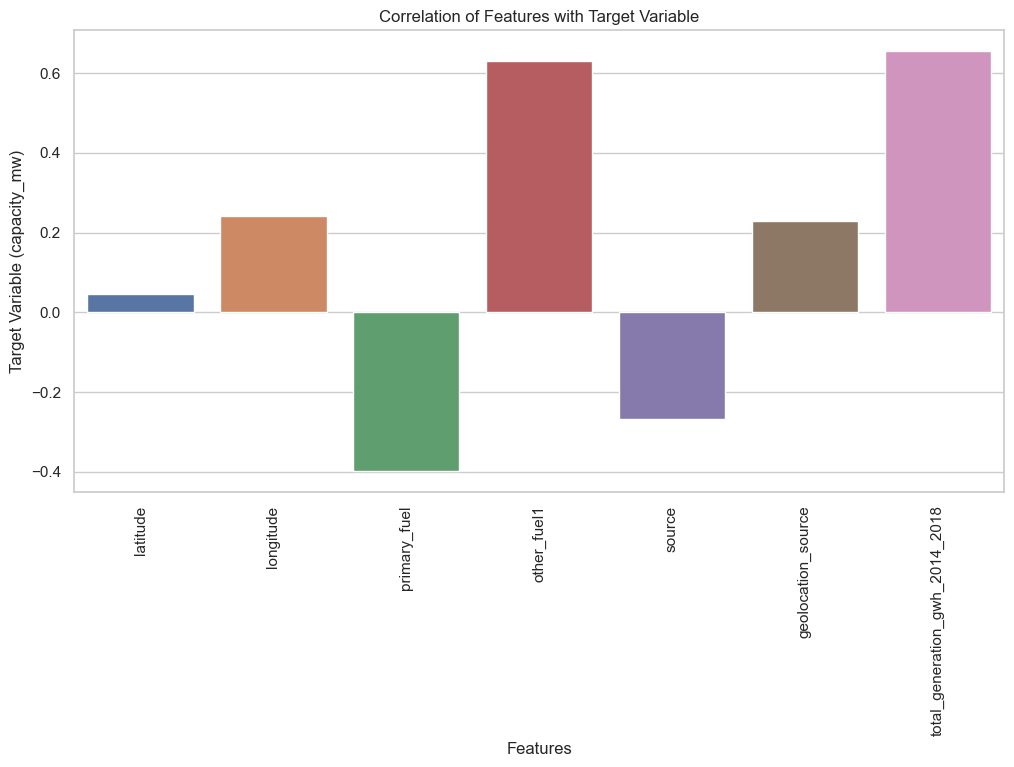

In [101]:
# Checking for the correlation between features and target variable separately
target = 'capacity_mw'

correlation_matrix = updated_df_r2.corr()
correlations_with_target = correlation_matrix[target].drop(target)

plt.figure(figsize=(12, 6))
sns.barplot(x = correlations_with_target.index, y = correlations_with_target.values)
plt.xlabel('Features')
plt.ylabel('Target Variable (capacity_mw)')
plt.title('Correlation of Features with Target Variable')
plt.xticks(rotation = 90)

plt.show()

### Observations:

primary_fuel: The type of primary fuel used in power stations has a negative correlation (-0.398651) with 'capacity_mw'. This indicates that power stations with certain types of primary fuel may have lower capacity, suggesting a potential limitation in capacity for certain fuel types.

latitude and longitude: The geographical coordinates of power stations, represented by 'latitude' and 'longitude', have a positive correlation with 'capacity_mw'. This suggests that the geographical location of a power station may be related to its capacity, with some locations having higher-capacity stations.

other_fuel1: The use of alternative fuels, as represented by 'other_fuel1', has a strong positive correlation (0.629975) with 'capacity_mw'. This implies that power stations with higher capacity are more likely to use alternative fuels as well.

source: The source of data for power stations has a negative correlation (-0.267975) with 'capacity_mw'. This indicates that the data source may be related to the capacity of power stations, with different data sources reporting different capacity levels for the same stations.

geolocation_source: The source of geolocation information, represented by 'geolocation_source', has a positive correlation (0.228151) with 'capacity_mw'. This suggests that the source of geolocation information may be related to the capacity of power stations, with specific geolocation sources associated with higher capacity stations.

total_generation_gwh_2014_2018: The total electricity generation from 2014 to 2018 has a strong positive correlation (0.654150) with 'capacity_mw'. This indicates that power stations with higher capacity tend to generate more electricity during this time period, which is expected as higher capacity stations have the potential to generate more power.

## Feature Engineering

### Feature Scaling

In [102]:
# Extracting features and target from the dataset
features = updated_df_r2.drop(columns = 'capacity_mw')
target = updated_df_r2['capacity_mw']

In [103]:
# Performing standard scaling on the features
scaler = StandardScaler()
scaled_df = scaler.fit_transform(features)

In [104]:
# Creating a DataFrame 'updated_features' to store the scaled data using 'scaled_df'
updated_features = pd.DataFrame(scaled_df, columns = features.columns[:])
updated_features.head()

,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,total_generation_gwh_2014_2018
0,1.154921,-0.898619,1.196332,-0.481251,1.426613,-1.059954,-0.903099
1,0.597612,-0.580463,-0.979948,-0.481251,2.865318,0.400613,-0.903099
2,0.130823,-1.797887,1.631588,-0.481251,-0.521172,0.400613,-0.903099
3,0.451648,3.314513,-0.544692,-0.481251,-0.499038,0.400613,1.090583
4,0.140037,1.233210,-0.979948,1.938833,-0.499038,0.400613,1.400270


### Checking for the Variance Inflation Factor

In [105]:
# Calculate VIF for each column
vif_data = pd.DataFrame()
vif_data["Features"] = updated_features.columns
vif_data["VIF"] = [variance_inflation_factor(updated_features.values, i) for i in range(updated_features.shape[1])]

# Print the VIF data
print(vif_data)

                         Features       VIF
0                        latitude  1.081850
1                       longitude  1.293823
2                    primary_fuel  2.206576
3                     other_fuel1  1.644425
4                          source  1.931843
5              geolocation_source  2.052230
6  total_generation_gwh_2014_2018  2.064573


The VIF values for all the features fall within a certain range.

In [106]:
# Storing features and target in X and y
X = updated_features
y = target

## Finding the best random state

In [107]:
# Function to find the best random state
def find_best_random_state(X, y, iterations = 200):
    max_r2_score = 0
    max_random_state = 0
    
    for i in range(1, iterations + 1):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = i)
        lr = LinearRegression()
        lr.fit(X_train, y_train)
        pred = lr.predict(X_test)
        r2score = r2_score(y_test, pred)
        
        if r2score > max_r2_score:
            max_r2_score = r2score
            max_random_state = i
    
    return max_r2_score, max_random_state

# Calling the function to find the best random state
best_r2_score, best_random_state = find_best_random_state(X, y)

print("Best R2 score is", best_r2_score, "at random state", best_random_state)

Best R2 score is 0.6312033677438887 at random state 82


## Splitting the dataset into training and testing sets

In [108]:
# Splitting the dataset for training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = best_random_state)

## Different Models for predicting Capacity_MW

In [109]:
# List of names of the models
models_name = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'ElasticNet Regression', 'K-Nearest Neighbors', 
               'Support Vector Regressor', 'Decision Tree Regressor', 'Random Forest Regressor', 'Extra Trees Regressor', 
               'Gradient Boosting Regressor', 'AdaBoost Regressor', 'Bagging Regressor', 'XGBoost Regressor']

In [110]:
# List of machine learning models
models = [LinearRegression(), 
          Lasso(), 
          Ridge(), 
          ElasticNet(), 
          KNeighborsRegressor(), 
          SVR(), 
          DecisionTreeRegressor(),
          RandomForestRegressor(), 
          ExtraTreesRegressor(), 
          GradientBoostingRegressor(), 
          AdaBoostRegressor(), 
          BaggingRegressor(),
          xgb.XGBRegressor()]

In [111]:
models_r2_score = [] # List for storing the models R2 score
models_mae = []      # List for storing the models Mean Absolute Error 
models_mse = []      # List for storing the models Mean Squared Error
models_rmse = []     # List for storing the models Root Mean Squred Error
i = 0
for model in models:
    
    print(models_name[i])
    
    model.fit(X_train, y_train)
    pred_y = model.predict(X_test)
    
    r2score = r2_score(y_test,pred_y)*100
    models_r2_score.append(r2score)
    
    mae = mean_absolute_error(y_test,pred_y)
    models_mae.append(mae)
    
    mse = mean_squared_error(y_test,pred_y)
    models_mse.append(mse)
    
    rmse = np.sqrt(mean_squared_error(y_test,pred_y))
    models_rmse.append(rmse)
    
    print("R2 score:", r2score)
    print("Mean Absolute Error:", mae)
    print("Mean Square Error:", mse)
    print("Root Mean Square Error:", rmse)
    print('\n')
    i += 1

Linear Regression
R2 score: 63.120336774388875
Mean Absolute Error: 166.07808373737552
Mean Square Error: 87999.61840608726
Root Mean Square Error: 296.64729630672053


Lasso Regression
R2 score: 63.083002791630804
Mean Absolute Error: 165.33359610926271
Mean Square Error: 88088.70208931374
Root Mean Square Error: 296.7974091688028


Ridge Regression
R2 score: 63.10415616837881
Mean Absolute Error: 166.0511668867731
Mean Square Error: 88038.2274125132
Root Mean Square Error: 296.7123647786071


ElasticNet Regression
R2 score: 55.48001721807978
Mean Absolute Error: 190.46748771167896
Mean Square Error: 106230.40325199808
Root Mean Square Error: 325.93005883471085


K-Nearest Neighbors
R2 score: 63.47818903589102
Mean Absolute Error: 137.74713371428572
Mean Square Error: 87145.73689786148
Root Mean Square Error: 295.20456788109067


Support Vector Regressor
R2 score: -5.271489615266178
Mean Absolute Error: 243.33212449257897
Mean Square Error: 251191.30992363588
Root Mean Square Error: 5

Linear Regression: The Linear Regression model shows a reasonable performance with an R2 score of 63.12%, indicating that it can explain a significant portion of the variance in the data. The Mean Absolute Error (MAE) of 166.08 and Root Mean Square Error (RMSE) of 296.65 are relatively moderate, suggesting that the model's predictions are reasonably close to the actual values.

Lasso Regression: Lasso Regression performs similarly to Linear Regression with a slightly lower R2 score of 63.08%. The MAE of 165.33 and RMSE of 296.80 are also comparable. This indicates that Lasso Regression provides a similar level of predictive accuracy as Linear Regression.

Ridge Regression: Ridge Regression, like Linear and Lasso Regression, demonstrates a similar level of performance with an R2 score of 63.10%. The MAE of 166.05 and RMSE of 296.71 are consistent with the other linear models, indicating that Ridge Regression is a reliable choice for this dataset.

ElasticNet Regression: ElasticNet Regression, while still reasonably performing with an R2 score of 55.48%, exhibits a slightly lower level of predictive accuracy compared to the linear models. The higher MAE of 190.47 and RMSE of 325.93 suggest that ElasticNet Regression might not explain as much variance in the data as the other linear models.

K-Nearest Neighbors (KNN) Regressor: KNN Regressor stands out with an R2 score of 63.48%, similar to the linear models but with lower error metrics. The MAE of 137.75 and RMSE of 295.20 indicate that KNN Regressor provides accurate predictions and may be a suitable choice for this dataset.

Support Vector Regressor (SVR): Unfortunately, the SVR model performs poorly with a negative R2 score of -5.27%, indicating that it doesn't fit the data well. The high MAE of 243.33 and RMSE of 501.19 suggest that SVR may not be an appropriate choice for this dataset, and further tuning is needed.

Decision Tree Regressor: The Decision Tree Regressor shows a relatively lower R2 score of 49.50% and higher error metrics with an MAE of 158.88 and RMSE of 347.14. This suggests that the model might not generalize well to unseen data, and other models may be more suitable.

Random Forest Regressor: Random Forest Regressor demonstrates strong predictive performance with a high R2 score of 73.40% and low error metrics (MAE: 122.06, RMSE: 251.94). It appears to be a robust choice for this dataset, offering accurate predictions.

Extra Trees Regressor: Extra Trees Regressor performs similarly to Random Forest with a high R2 score of 74.17% and low error metrics (MAE: 120.14, RMSE: 248.26). This model, like Random Forest, provides strong predictive capabilities.

Gradient Boosting Regressor: Gradient Boosting Regressor excels with the highest R2 score of 75.33% and low error metrics (MAE: 118.34, RMSE: 242.65). It stands out as an excellent choice for accurate predictions.

AdaBoost Regressor: AdaBoost Regressor, while achieving a decent R2 score of 68.98%, has higher error metrics (MAE: 226.34, RMSE: 272.06) compared to the top-performing models. It may not be as precise in its predictions.

Bagging Regressor: Bagging Regressor delivers a strong performance with a high R2 score of 72.15% and low error metrics (MAE: 123.70, RMSE: 257.79). It provides accurate predictions, making it a reliable choice.

XGBoost Regressor: XGBoost Regressor offers a good balance of predictive accuracy with an R2 score of 69.09% and competitive error metrics (MAE: 129.49, RMSE: 271.58). It represents a solid choice for accurate predictions while maintaining computational efficiency.

## Cross Validation

In [112]:
i = 0
diff_r2_cv = []
cv_mean = []
for model in models:
    print(models_name[i])
    print("R2 Score:", models_r2_score[i])
    cv_score = cross_val_score(model, X, y)
    print("Cross Validation Scores:", cv_score*100)
    cv_mean.append(cv_score.mean()*100)
    print("Mean of Cross Validation Scores:", cv_score.mean()*100)
    diff = models_r2_score[i] - cv_score.mean()*100
    print("Difference between R2 Score and Cross Validation score:", diff)
    diff_r2_cv.append(diff)
    print('\n')
    i += 1

Linear Regression
R2 Score: 63.120336774388875
Cross Validation Scores: [52.0948374  55.58613301 47.47539244 60.03040249 51.46961753]
Mean of Cross Validation Scores: 53.331276571569774
Difference between R2 Score and Cross Validation score: 9.789060202819101


Lasso Regression
R2 Score: 63.083002791630804
Cross Validation Scores: [52.11438326 55.6819141  47.4320961  60.01966775 51.47677698]
Mean of Cross Validation Scores: 53.34496764061301
Difference between R2 Score and Cross Validation score: 9.738035151017797


Ridge Regression
R2 Score: 63.10415616837881
Cross Validation Scores: [52.11125516 55.61195272 47.4641163  60.01844123 51.47449042]
Mean of Cross Validation Scores: 53.33605116379514
Difference between R2 Score and Cross Validation score: 9.768105004583667


ElasticNet Regression
R2 Score: 55.48001721807978
Cross Validation Scores: [50.93186101 54.98011595 41.98065048 53.81601424 48.39788034]
Mean of Cross Validation Scores: 50.021304403318254
Difference between R2 Score an

Linear Regression: Linear regression performs well with an R2 score of 63.12, indicating a good fit to the data. The difference between the R2 score and cross-validation score is 9.79, suggesting reasonable generalization.

Lasso Regression: Lasso regression also demonstrates a strong fit with an R2 score of 63.08. The difference between the R2 score and cross-validation score is 9.74, indicating consistent performance.

Ridge Regression: Ridge regression achieves an R2 score of 63.10, indicating a solid fit to the data. The difference between the R2 score and cross-validation score is 9.77, showing stable generalization.

ElasticNet Regression: ElasticNet regression has an R2 score of 55.48, somewhat lower than the previous models. The difference between the R2 score and cross-validation score is 5.46, indicating more stable performance.

K-Nearest Neighbors (KNN): KNN performs well with an R2 score of 63.48, suggesting a good fit to the data. The difference between the R2 score and cross-validation score is 5.72, indicating reasonable generalization.

Support Vector Regressor (SVR): SVR struggles with an R2 score of -5.27, indicating a poor fit to the data. The difference between the R2 score and cross-validation score is 2.45, suggesting a lack of generalization.

Decision Tree Regressor: The decision tree model achieves an R2 score of 49.50, lower than other models, and is overfitting as indicated by the negative difference of -6.31.

Random Forest Regressor: Random Forest performs well with an R2 score of 73.40 and a small difference of 0.27, indicating robust performance.

Extra Trees Regressor: Extra Trees Regressor achieves a high R2 score of 74.17 with a moderate difference of 2.67, indicating strong performance.

Gradient Boosting Regressor: Gradient Boosting Regressor stands out with the highest R2 score of 75.33 and a difference of 4.59, indicating excellent performance.

AdaBoost Regressor: AdaBoost Regressor has a decent R2 score of 68.98 but a large difference of 16.24, suggesting variability in performance.

Bagging Regressor: Bagging Regressor performs well with an R2 score of 72.15 and a small difference of 1.54, indicating solid generalization.

XGBoost Regressor: XGBoost Regressor achieves a good R2 score of 69.09 with a minimal difference of -0.10, indicating consistent performance.

In [113]:
# Storing the performance summary of all the models
models_performance = pd.DataFrame({'Model': models_name, 
                                   'R2 Score': models_r2_score,
                                   'MAE': models_mae,
                                   'MSE': models_mse,
                                   'RMSE': models_rmse,
                                   'CV Score Mean': cv_mean,
                                   'Difference: R2 Score & CV Score': diff_r2_cv})

In [114]:
models_performance

,Model,R2 Score,MAE,MSE,RMSE,CV Score Mean,Difference: R2 Score & CV Score
0,Linear Regression,63.120337,166.078084,87999.618406,296.647296,53.331277,9.789060
1,Lasso Regression,63.083003,165.333596,88088.702089,296.797409,53.344968,9.738035
2,Ridge Regression,63.104156,166.051167,88038.227413,296.712365,53.336051,9.768105
3,ElasticNet Regression,55.480017,190.467488,106230.403252,325.930059,50.021304,5.458713
4,K-Nearest Neighbors,63.478189,137.747134,87145.736898,295.204568,57.755743,5.722446
5,Support Vector Regressor,-5.271490,243.332124,251191.309924,501.189894,-7.724350,2.452861
6,Decision Tree Regressor,49.496793,158.884133,120507.145946,347.141392,55.801919,-6.305127
7,Random Forest Regressor,73.398028,122.063547,63475.726814,251.943896,73.126934,0.271094
8,Extra Trees Regressor,74.169259,120.137913,61635.468535,248.264916,71.496164,2.673095
9,Gradient Boosting Regressor,75.325311,118.344073,58876.980923,242.645793,70.732986,4.592325


## Final Model
After careful evaluation, the Extra Trees Regressor stands out as the best model with an R2 score of 74.17%, the Extra Tress Regressor exhibits strong performance in fitting the training data. Additionally, the difference between the R2 score and the mean of cross-validation scores is minimal at 2.67%, suggesting that the model maintains stability and accuracy. This balance between accuracy and stability makes the Extra Trees Regressor a prudent choice for the final model.

## Hyper Parameter Tuning

In [115]:
# Parameters grid for hyper parameter tuning
parameters_grid = {
    'n_estimators': [100, 200, 300],  # Number of decision trees in the ensemble
    'max_depth': [None, 10, 20],      # Maximum depth of each decision tree (or None for unlimited depth)
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]     # Minimum number of samples required to be at a leaf node
}

In [116]:
# Using grid search CV for enhancing the model performance
grid_search_cv = GridSearchCV(ExtraTreesRegressor(), param_grid = parameters_grid, cv = 5, scoring = 'r2')

In [117]:
# Performing grid search to find the best hyperparameters for the model
grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [118]:
# Retrieving the best hyperparameters found during grid search
grid_search_cv.best_params_

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 200}

In [119]:
# Storing the best parameters
best_params = grid_search_cv.best_params_

In [120]:
# Retrieving the best mean cross-validated score achieved during grid search
grid_search_cv.best_score_

0.7314330474474519

In [121]:
# Creating final model
final_model = ExtraTreesRegressor(**best_params)
final_model.fit(X_train, y_train)
pred_values = final_model.predict(X_test)
r2_score = r2_score(y_test, pred_values)
print(r2_score * 100)

76.34472684764393


#### Final model has achieved an accuracy rate of 76.34%.

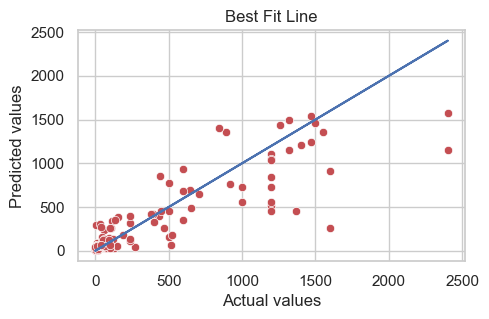

In [122]:
# Comparing actual vaules and predicted vaulues graphically
plt.figure(figsize = (5, 3))
sns.scatterplot(x = y_test, y = pred_values, color='r')
plt.plot(y_test, y_test, color='b')
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Best Fit Line")
plt.show()

## Saving Final Model

In [123]:
# Saving the model 
joblib.dump(final_model, "Global_Power_Plant_Capacity(mw)_Prediction_Model.pkl")

['Global_Power_Plant_Capacity(mw)_Prediction_Model.pkl']

In [124]:
# Loading the saved model
model = joblib.load("Global_Power_Plant_Capacity(mw)_Prediction_Model.pkl")

# Predicting values
predicted_values = model.predict(X_test)

In [125]:
# Saving the actual values
actual_values = np.array(y_test)

In [126]:
# Comparing the actual and predicted values
actual_vs_predicted = pd.DataFrame({'Actual Vlaues' : actual_values , 'Predicted Values' : predicted_values})
actual_vs_predicted

,Actual Vlaues,Predicted Values
0,25.5,47.840281
1,25.0,22.025094
2,270.0,42.716882
3,125.0,37.774918
4,42.0,80.612344
...,...,...
170,520.0,175.891675
171,69.6,50.809664
172,99.0,67.193353
173,1500.0,1463.289365


# Global Power Plant Database Project Documentation

## Project Overview

### Objective
The Global Power Plant Database project focuses on two primary objectives.

#### Objective-1
The first objective of this project is to predict the power plant's primary fuel using a classification model. This prediction will be based on the details provided in the dataset. The goal is to accurately classify the primary fuel type used by the power plant, to enhance understanding of fuel usage patterns.

#### Objective-2
The second objective of this project is to predict the power plant's capacity_mw using a regression model. Similar to the first objective, this prediction will also rely on the dataset's information. The aim is to provide an accurate forecast of the power plant's capacity_mw, facilitating a comprehensive analysis of power generation capabilities.

### Data Source
The dataset used for Global Power Plant Database Project is obtained from a CSV file that encompasses critical information concerning power plants, encompassing attributes such as power generation capacity, primary fuel sources, geographical locations, annual data, regional specifics, and other pertinent factors that impact the dynamics of the global power plant landscape.

### Data Preprocessing
#### Data Cleaning
Data cleaning was performed to handle missing values, ensuring the dataset's completeness.
Outliers, if present, were identified and addressed appropriately.

#### Feature Engineering
Relevant features were selected or created to enhance models performance.
Feature extraction and transformation techniques, such as encoding categorical variables, were applied as needed.

### Data Splitting
The dataset was divided into training and testing sets to evaluate models performance. The split is 80% for training and 20% for testing in both the models.

### Feature Scaling
Features were scaled or normalized to ensure that models are not biased by variables with larger scales.

### Models Employed
#### Model Selection

Several machine learning models were employed to predict primary_fuel' and 'capacity_mw':
#### In case of Classification model
'Logistic Regression', 'K-Nearest Neighbors', 'Gaussian Naive Bayes', 'Support Vector Classifier', 'Decision Tree Classifier', 'Random Forest Classifier', 'Extra Trees Classifier', 'Gradient Boosting Classifier', 'AdaBoost Classifier', 'Bagging Classifier', 'XGBoost Classifier'.

#### In case of Regression model
'Linear Regression', 'Lasso Regression', 'Ridge Regression', 'ElasticNet Regression', 'K-Nearest Neighbors', 'Support Vector Regressor', 'Decision Tree Regressor', 'Random Forest Regressor', 'Extra Trees Regressor', 'Gradient Boosting Regressor', 'AdaBoost Regressor', 'Bagging Regressor', 'XGBoost Regressor'.

Each model mentioned above was trained on the training dataset.


### Model Evaluation and Hyperparameter Tuning
#### Model Evaluation Metrics
#### In case of Classification model
Accuracy: This metric measures the proportion of correctly classified power plant's primary fuel type.

Precision: Precision evaluates the model's ability to correctly predict power plant's primary fuel type.

Recall: Recall measures the model's ability to identify all actual instances of specific power plant's primary fuel type.

F1-Score: The F1-Score combines precision and recall to provide a balanced measure of the model's overall performance in capturing power plant's primary fuel type accurately.
#### In case of Regression model
The following evaluation metrics were used to assess model performance:

Mean Absolute Error (MAE): Measures the average absolute difference between predicted and actual values.

Mean Squared Error (MSE): Provides a measure of the squared error between predicted and actual values.

Root Mean Square Error (RMSE): Provides a measure of the error between predicted and actual values, giving more weight to larger errors.

R-squared (R2): Indicates the proportion of variance in the dependent variable that is predictable from the independent variables.

#### Model Comparison
The performance of each model was compared based on the evaluation metrics mentioned above in case of both classification and regression.

#### Hyperparameter Tuning
Hyperparameter tuning techniques, such as grid search, was employed to optimize models performance.

### Results
#### Final Model Selection
#### In case of Classification model
After careful evaluation, the Extra Trees Classifier model was selected as the final model for for predicting power plant's primary fuel type, primarily due to its outstanding performance.

#### In case of Regression model
After careful evaluation, the Extra Trees Regressor model was selected as the final model for predicting power plant's electrical generating capacity in megawatts (capcity_mw), owing to its exceptional performance. 
### Key Findings
#### In case of Classification model
Capacity and Fuel: High-capacity power stations tend to use different primary fuels.

Location (Latitude and Longitude): Location has little influence on primary fuel choice.

Alternative Fuels: Power stations using alternative fuels have specific primary fuel preferences.

Data Source and Fuel: Different data sources report varying primary fuel types for the same station.

Geolocation Source and Fuel: The source of geolocation data affects primary fuel choice.

Electricity Generation:Primary fuel choice impacts total electricity generation (2014-2018).

#### In case of Regression model
Primary Fuel and Capacity: Certain primary fuel types are correlated with lower station capacity.

Location (Latitude and Longitude) and Capacity: Geographical location is related to power station capacity, with some locations having higher-capacity stations.

Alternative Fuels and Capacity: Higher-capacity stations are more likely to use alternative fuels. 

Data Source and Capacity: Different data sources may report varying capacity levels for the same stations. 

Geolocation Source and Capacity: Specific geolocation sources are associated with higher-capacity stations.

Electricity Generation and Capacity (2014-2018): Higher-capacity stations generate more electricity during this time period.

### Conclusion
In conclusion, the Global Power Database Project is dedicated to tackling the challenges associated with understanding the dynamics of power stations, fuel choices, and capacity variations across geographical locations. Utilizing advanced data analysis and predictive modeling techniques, this project empowers stakeholders in the energy sector to access valuable insights and base their decisions on data-driven strategies. These insights facilitate enhanced management of power supply chains, the formulation of effective pricing strategies, and informed market planning. As a result, the Global Power Database Project plays a pivotal role in promoting efficiency and informed decision-making across the global power industry.